# ASSIGNMENT 1: ENSEMBLE MODELS

MBAN 6120 U - DATA SCIENCE II

Neil Haolan Xu & Allen Lin Yang

Sep.25th, 2024

This assignment aims to build, evaluate, and compare and contrast ensemble models with standard machine learning models. In this assignment, the 'y' column, which shows whether the client subsribes a term deposit, will be the target variable for all the ML models.

# Part 1: Data Prepossessing

In [71]:
# Load the dataset

import pandas as pd

# URLs of the CSV files (which are saved into my personal GitHub)
train_url = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Assignment%201/train.csv"

# Load the CSV files directly from the URLs
train_data = pd.read_csv(train_url, delimiter=';')

# Display the first few rows of each dataset
print("\nTrain data:")
print(train_data.head())


Train data:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Because the test_data was randomly selected from the train_data and all observations in the test_data are included in the train_data, we will only use the train_data and conduct the train-test split later, in order to avoid the repetition of observations.

1. Check the basic information of the dataset

In [72]:
print("Shape of train_data:", train_data.shape)
print("\nColumns of train_data:", train_data.columns.tolist())
print("\nInfo of train_data:")
train_data.info()
print("\nHead of train_data:")
print(train_data.head())
print("\nTail of train_data:")
print(train_data.tail())

Shape of train_data: (45211, 17)

Columns of train_data: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Info of train_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   4521

2. Check the data imbalance


Training Data Imbalance:
     Count  Percentage
y                     
no   39922    88.30152
yes   5289    11.69848
Imbalance Ratio: 7.55


C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\2101750505.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v, f"{v}\n({class_percentages[i]:.1f}%)",


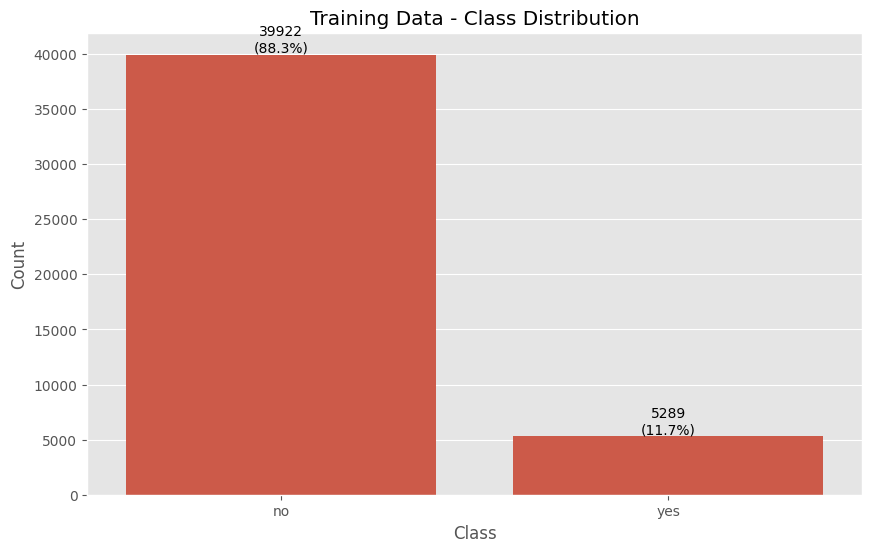

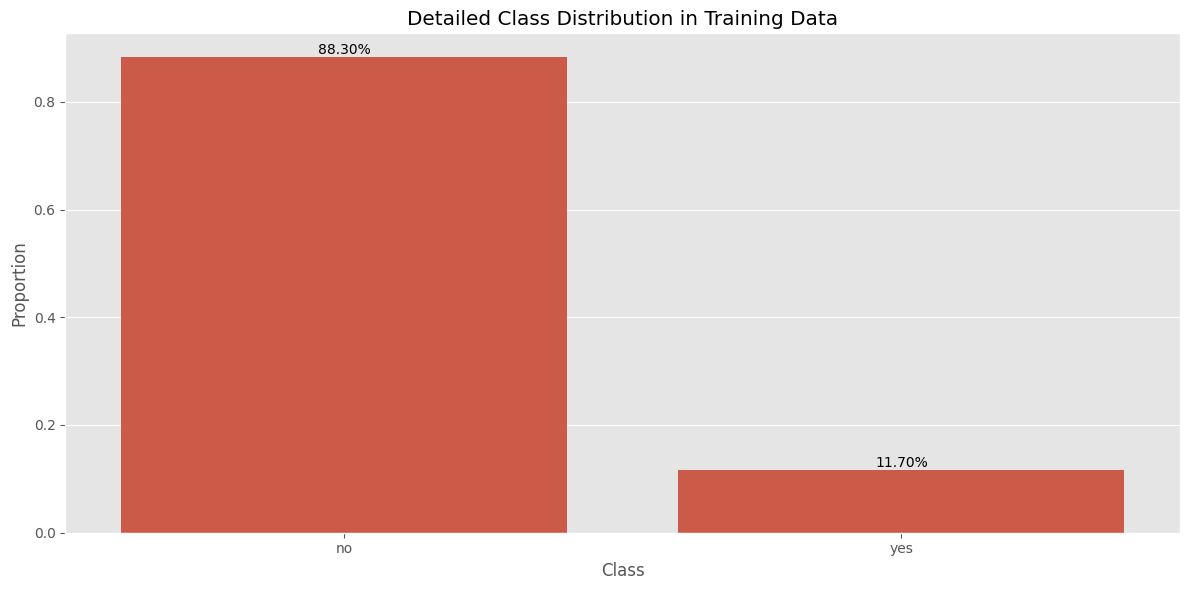


Detailed Training Data Statistics:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Total number of samples: 45211


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_imbalance(data, title):
    # Count the occurrences of each class
    class_counts = data['y'].value_counts()
    
    # Calculate percentages
    class_percentages = 100 * class_counts / len(data)
    
    # Create a DataFrame for easy printing
    imbalance_df = pd.DataFrame({
        'Count': class_counts,
        'Percentage': class_percentages
    })
    
    print(f"\n{title} Data Imbalance:")
    print(imbalance_df)
    
    # Calculate imbalance ratio
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title(f"{title} Data - Class Distribution")
    plt.xlabel('Class')
    plt.ylabel('Count')
    
    # Add value labels on the bars
    for i, v in enumerate(class_counts.values):
        plt.text(i, v, f"{v}\n({class_percentages[i]:.1f}%)", 
                 ha='center', va='bottom')
    
    plt.show()

# Check imbalance for train data
check_imbalance(train_data, "Training")

# Plotting detailed distribution
plt.figure(figsize=(12, 6))
train_distribution = train_data['y'].value_counts(normalize=True)
sns.barplot(x=train_distribution.index, y=train_distribution.values)
plt.title('Detailed Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
for i, val in enumerate(train_distribution):
    plt.text(i, val, f'{val:.2%}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Training Data Statistics:")
print(train_data['y'].value_counts(normalize=True))
print("\nTotal number of samples:", len(train_data))

This dataset exhibits a significant imbalance. We need to consider this factor when conducting further testing and modelling.

3. Check missing values

In [74]:
# Check for missing values in train_data and test_data
missing_values_train = train_data.isnull().sum()
print(missing_values_train)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


No missing data in this dataset.

In [75]:
train_data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

4.1 Explore Categorical Features

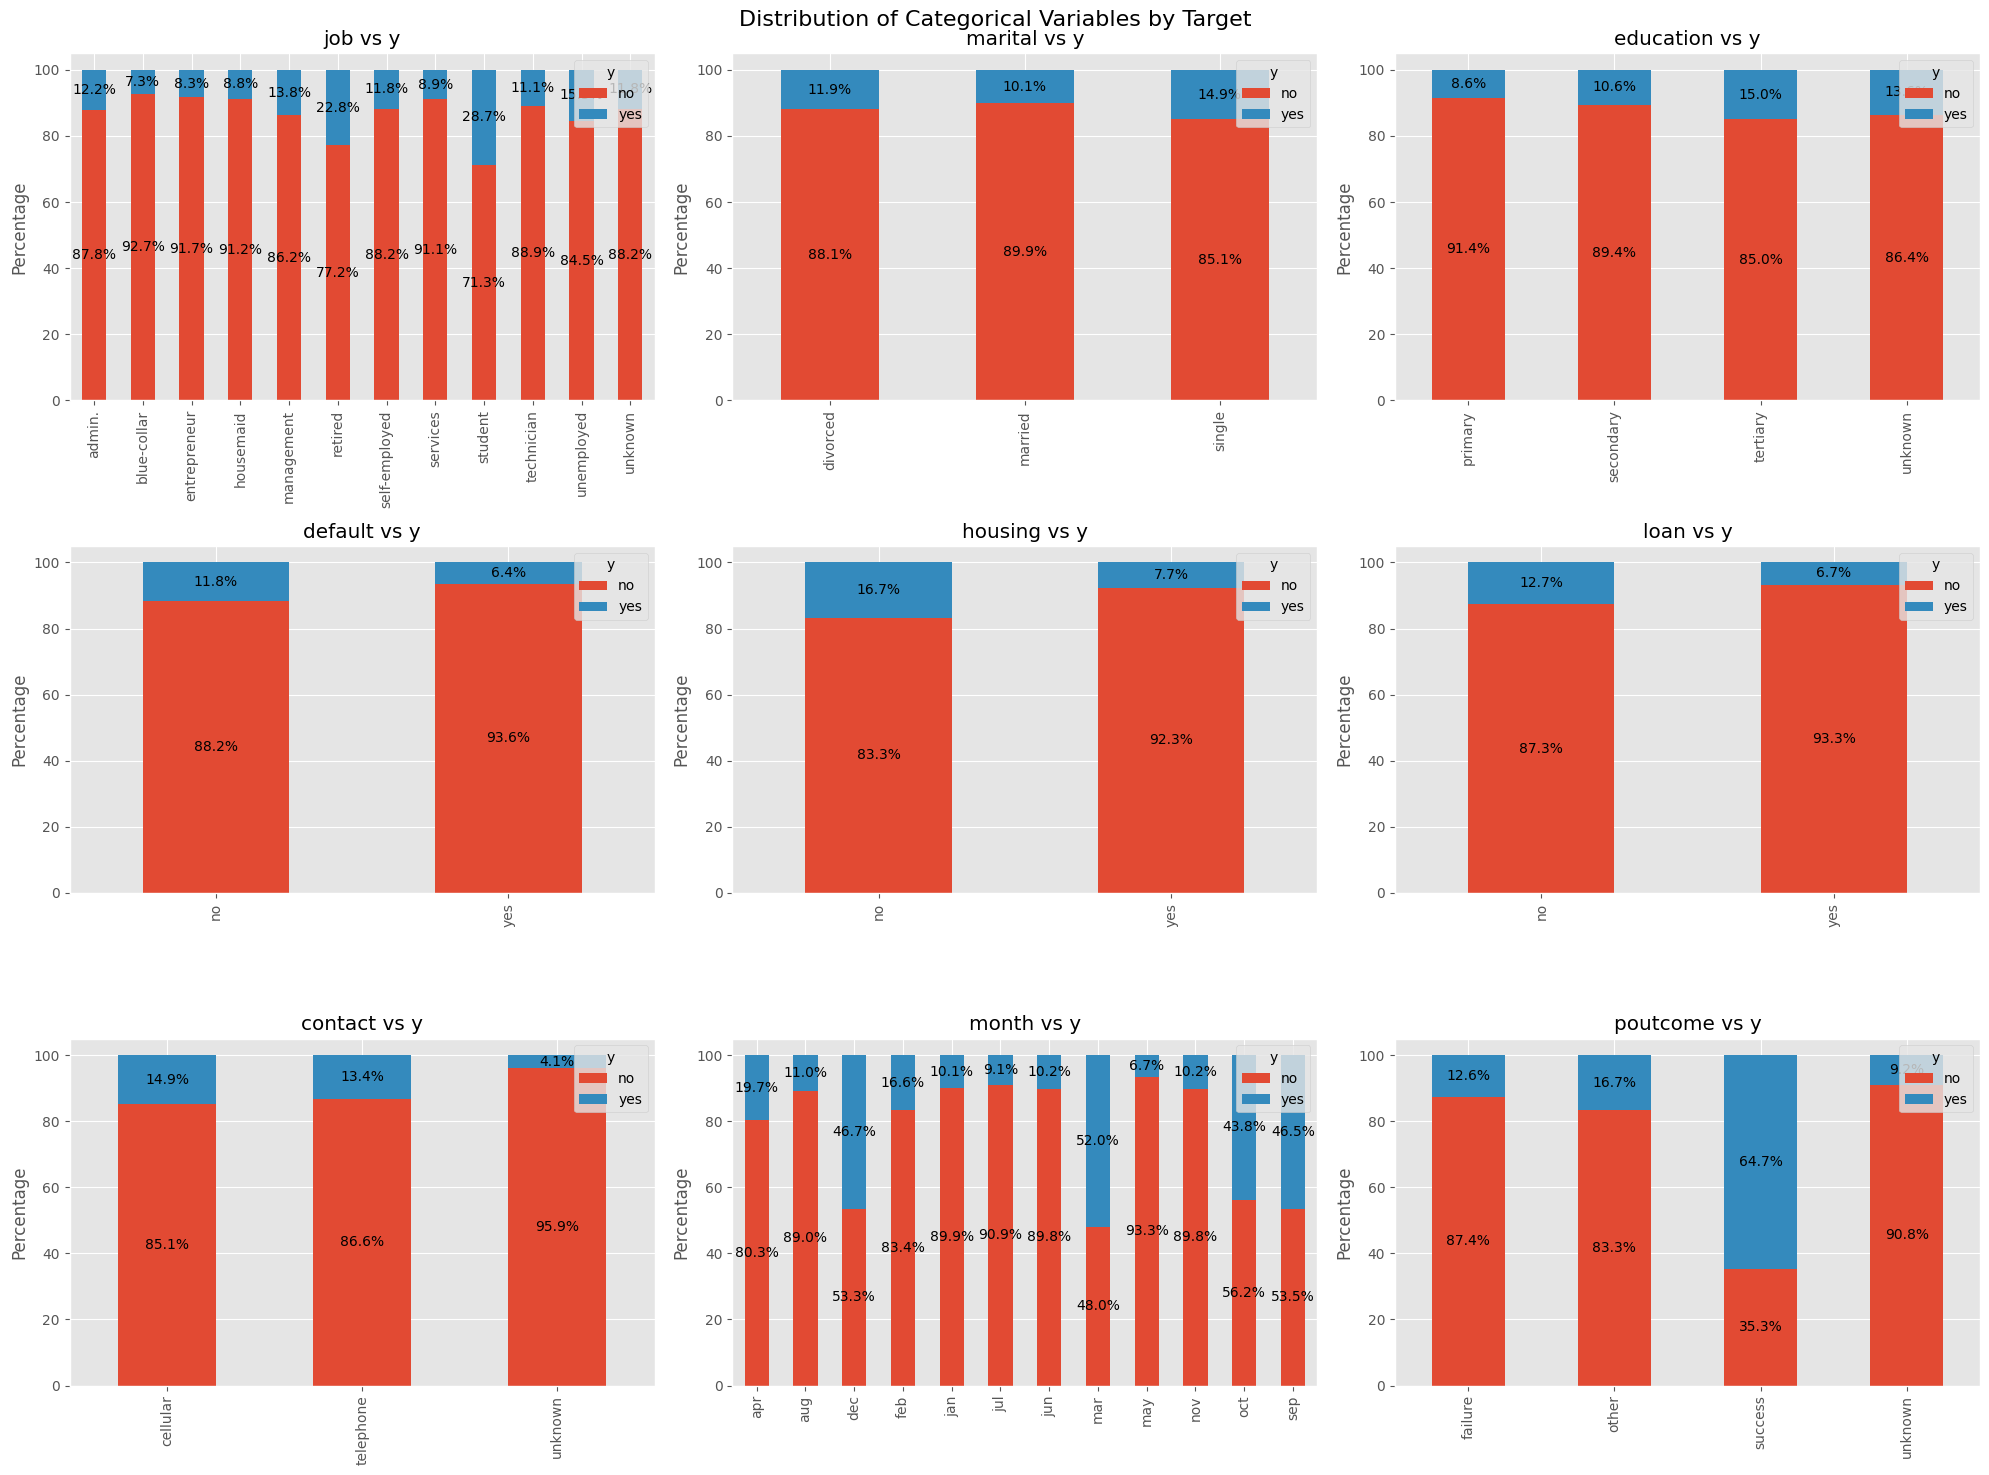

In [76]:
# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove target variable from the list

# Set up the plot
n_cols = 3
n_rows = (len(categorical_cols) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distribution of Categorical Variables by Target', fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Create histograms
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Calculate percentage distributions
    pct_data = train_data.groupby(col)['y'].value_counts(normalize=True).unstack()
    pct_data = pct_data.mul(100)
    
    # Plot stacked bar chart
    pct_data.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_title(f'{col} vs y')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')
    ax.legend(title='y', loc='upper right')
    
    # Add percentage labels
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%', label_type='center')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on the histograms we generated, we noticed significant variations in the relationships between the target variable 'y' and categorical features such as job, marital status, education, default, housing, loan, month, and 'poutcome'. However, we still need to examine the distributions of classes for each categorical feature.

C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

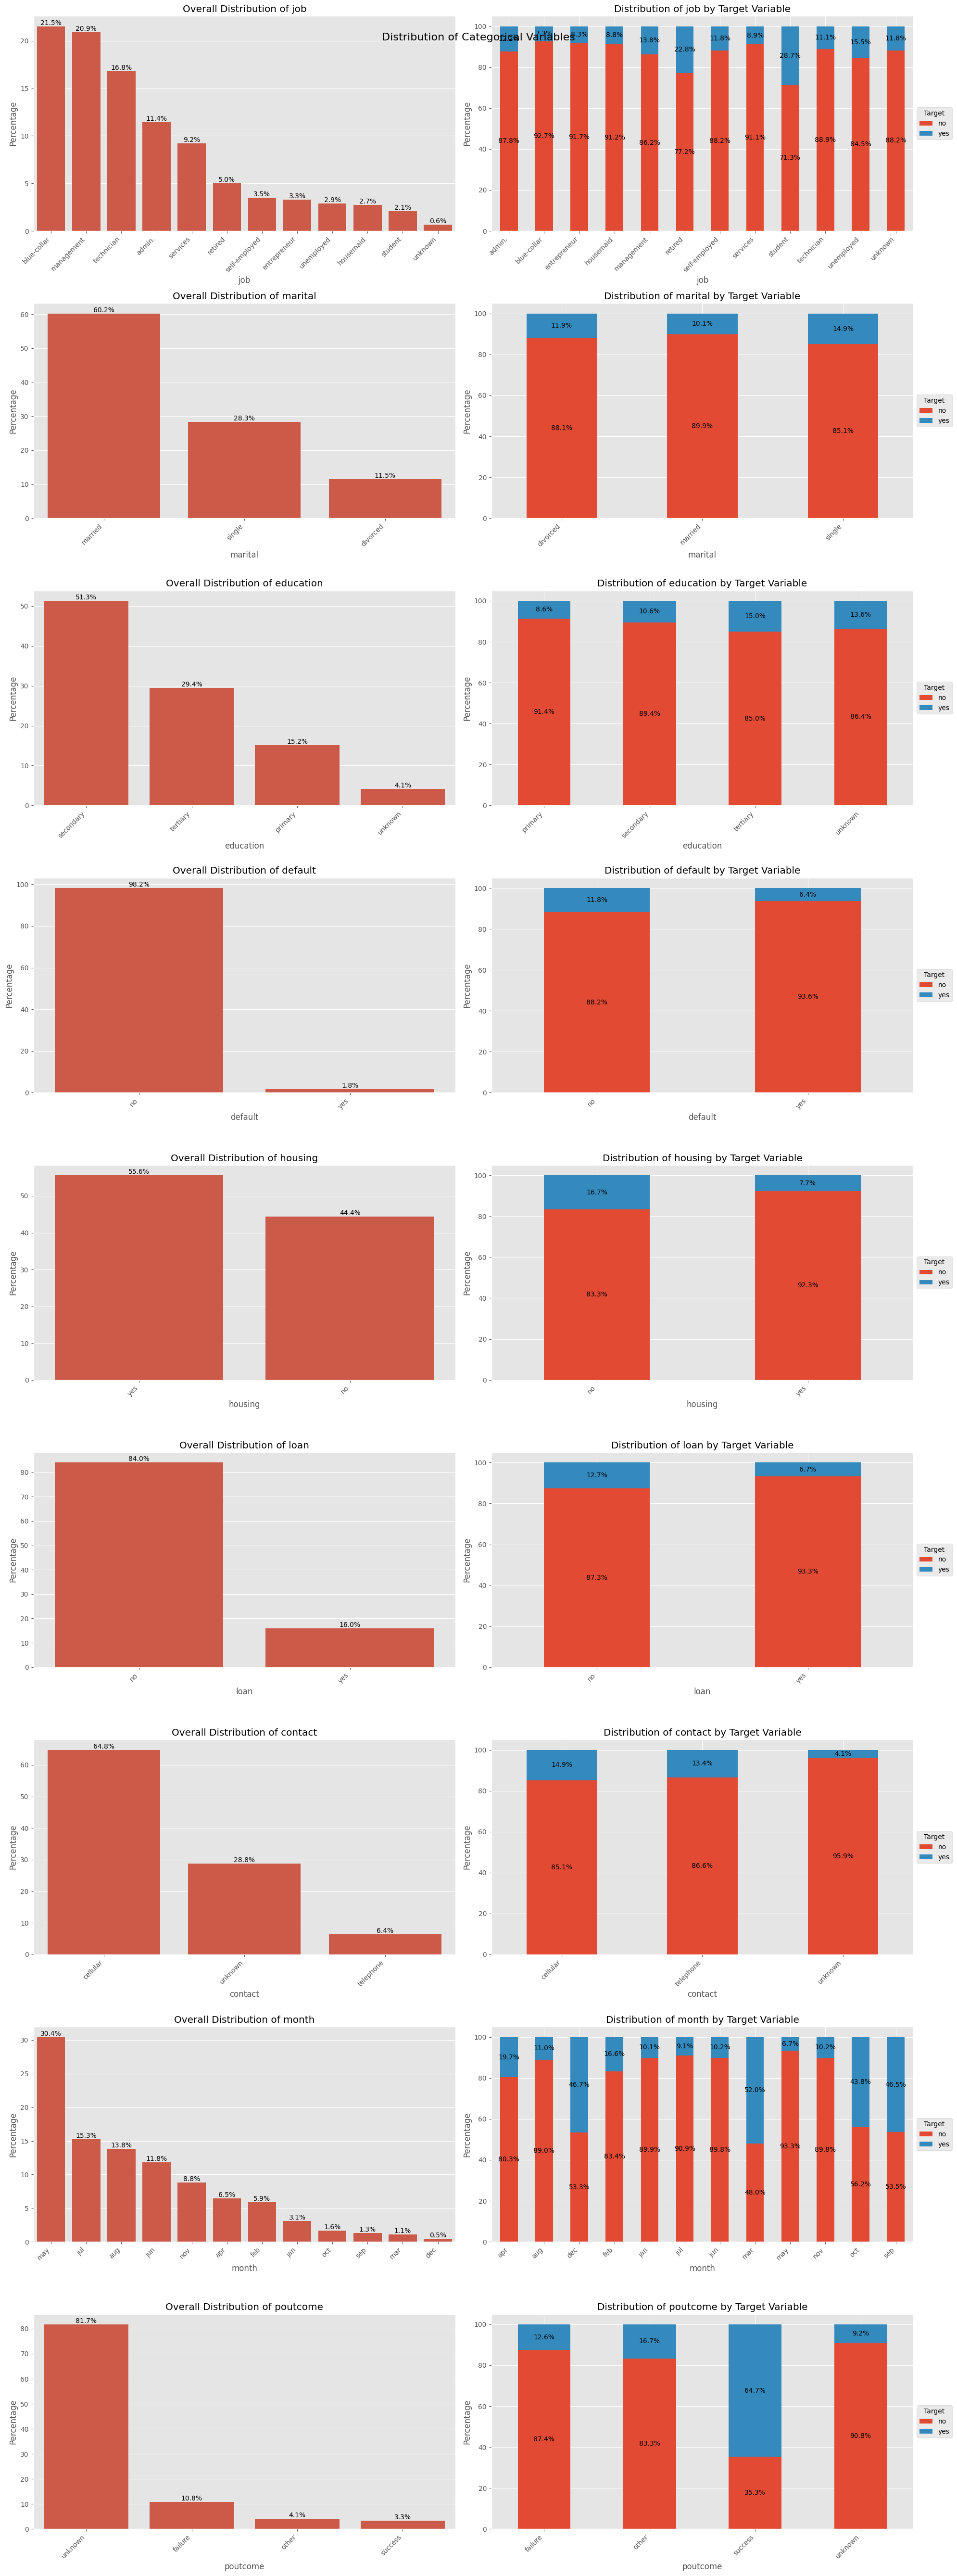


Detailed statistics for job:
Overall distribution:
  blue-collar: 21.53%
  management: 20.92%
  technician: 16.80%
  admin.: 11.44%
  services: 9.19%
  retired: 5.01%
  self-employed: 3.49%
  entrepreneur: 3.29%
  unemployed: 2.88%
  housemaid: 2.74%
  student: 2.07%
  unknown: 0.64%

Distribution by target variable:
y                     no        yes
job                                
admin.         87.797331  12.202669
blue-collar    92.725031   7.274969
entrepreneur   91.728312   8.271688
housemaid      91.209677   8.790323
management     86.244449  13.755551
retired        77.208481  22.791519
self-employed  88.157061  11.842939
services       91.116996   8.883004
student        71.321962  28.678038
technician     88.943004  11.056996
unemployed     84.497314  15.502686
unknown        88.194444  11.805556


Detailed statistics for marital:
Overall distribution:
  married: 60.19%
  single: 28.29%
  divorced: 11.52%

Distribution by target variable:
y                no        yes


In [77]:
# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove target variable from the list

# Set up the plot
n_cols = 2
n_rows = len(categorical_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Create plots for each categorical variable
for i, col in enumerate(categorical_cols):
    # Overall distribution
    ax1 = axes[i, 0]
    overall_dist = train_data[col].value_counts(normalize=True) * 100
    sns.barplot(x=overall_dist.index, y=overall_dist.values, ax=ax1)
    ax1.set_title(f'Overall Distribution of {col}')
    ax1.set_ylabel('Percentage')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels
    for j, v in enumerate(overall_dist.values):
        ax1.text(j, v, f'{v:.1f}%', ha='center', va='bottom')

    # Distribution by target variable
    ax2 = axes[i, 1]
    target_dist = pd.crosstab(train_data[col], train_data['y'], normalize='index') * 100
    target_dist.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title(f'Distribution of {col} by Target Variable')
    ax2.set_ylabel('Percentage')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.legend(title='Target', loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Add percentage labels
    for c in ax2.containers:
        ax2.bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

# Print detailed statistics
for col in categorical_cols:
    print(f"\nDetailed statistics for {col}:")
    
    # Overall distribution
    overall_dist = train_data[col].value_counts(normalize=True) * 100
    print("Overall distribution:")
    for category, percentage in overall_dist.items():
        print(f"  {category}: {percentage:.2f}%")
    
    # Distribution by target variable
    target_dist = pd.crosstab(train_data[col], train_data['y'], normalize='index') * 100
    print("\nDistribution by target variable:")
    print(target_dist)
    print("\n" + "="*50)

The graphs above show a significant data imbalance in certain features, such as month. For instance, we observe that in March, September, November, and December, the proportion of 'yes' in column 'y' is significantly higher compared to other months. However, these four months have the fewest observations. This imbalance may be due to insufficient data and may not accurately represent the true trend. Therefore, more investigation and feature engineering are necessary.

4.2 Feature Engineer the Categorical variables

We have a significant amount of unknown data for features like 'poutcome' and 'contact', which could make the models inefficient. Therefore, we will treat them as missing values and use the KNN imputer (base on jobs, education, previous, loan, age) to predict the values for the unknown data.

To create more balanced classes in certain categories, we will group the data in the 'month' column into two groups instead of individual months. Additionally, we will categorize the data in the 'job' column as either 'employed' or 'unemployed'. This will help address the existing data imbalance among the classes of these features.

In [78]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Replace 'unknown' with NaN
train_data = train_data.replace('unknown', np.nan)

# Features to base the imputation on
base_features = ['campaign', 'loan', 'age', 'balance', 'education']

# Features to impute
impute_features = ['poutcome', 'contact']

# Combine all features for encoding
all_features = base_features + impute_features

# Create an OrdinalEncoder for categorical variables
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the encoder on all relevant features
encoded_features = ordinal_encoder.fit_transform(train_data[all_features])

# Create a new dataframe with encoded values
encoded_df = pd.DataFrame(encoded_features, columns=all_features)

# Create and fit the KNN imputer
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(encoded_df)

# Create a new dataframe with imputed values
imputed_df = pd.DataFrame(imputed_values, columns=all_features)

# Inverse transform the encoded and imputed values back to original categories
original_imputed = ordinal_encoder.inverse_transform(imputed_df)

# Update the original train_data with imputed values for 'poutcome' and 'contact'
train_data[impute_features] = pd.DataFrame(original_imputed, columns=all_features)[impute_features]

# Function to relabel months into quarters
def relabel_month(month):
    if month in ['may', 'jun', 'jul']:
        return 'May-to-July'
    else:
        return 'Others'

# Function to relabel job
def relabel_job(job):
    if job in ['retired', 'student', 'unemployed']:
        return 'unemployed'
    else:
        return 'employed'

# Apply the relabeling to 'month' and 'job' columns
train_data['month'] = train_data['month'].apply(relabel_month)
train_data['job'] = train_data['job'].apply(relabel_job)

# Print some information about the imputation and relabeling
print("Imputation and relabeling complete.")
print("\nMissing values after imputation:")
print(train_data[impute_features].isnull().sum())
print("\nUnique values after imputation and relabeling:")
for feature in impute_features + ['month', 'job']:
    print(f"{feature}: {train_data[feature].unique()}")

# The train_data DataFrame now contains the imputed values and relabeled columns

Imputation and relabeling complete.

Missing values after imputation:
poutcome    0
contact     0
dtype: int64

Unique values after imputation and relabeling:
poutcome: ['failure' 'other' 'success']
contact: ['cellular' 'telephone']
month: ['May-to-July' 'Others']
job: ['employed' 'unemployed']


Now we will visualize the categorical features again.

C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3725747147.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3725747147.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3725747147.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\3725747147.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

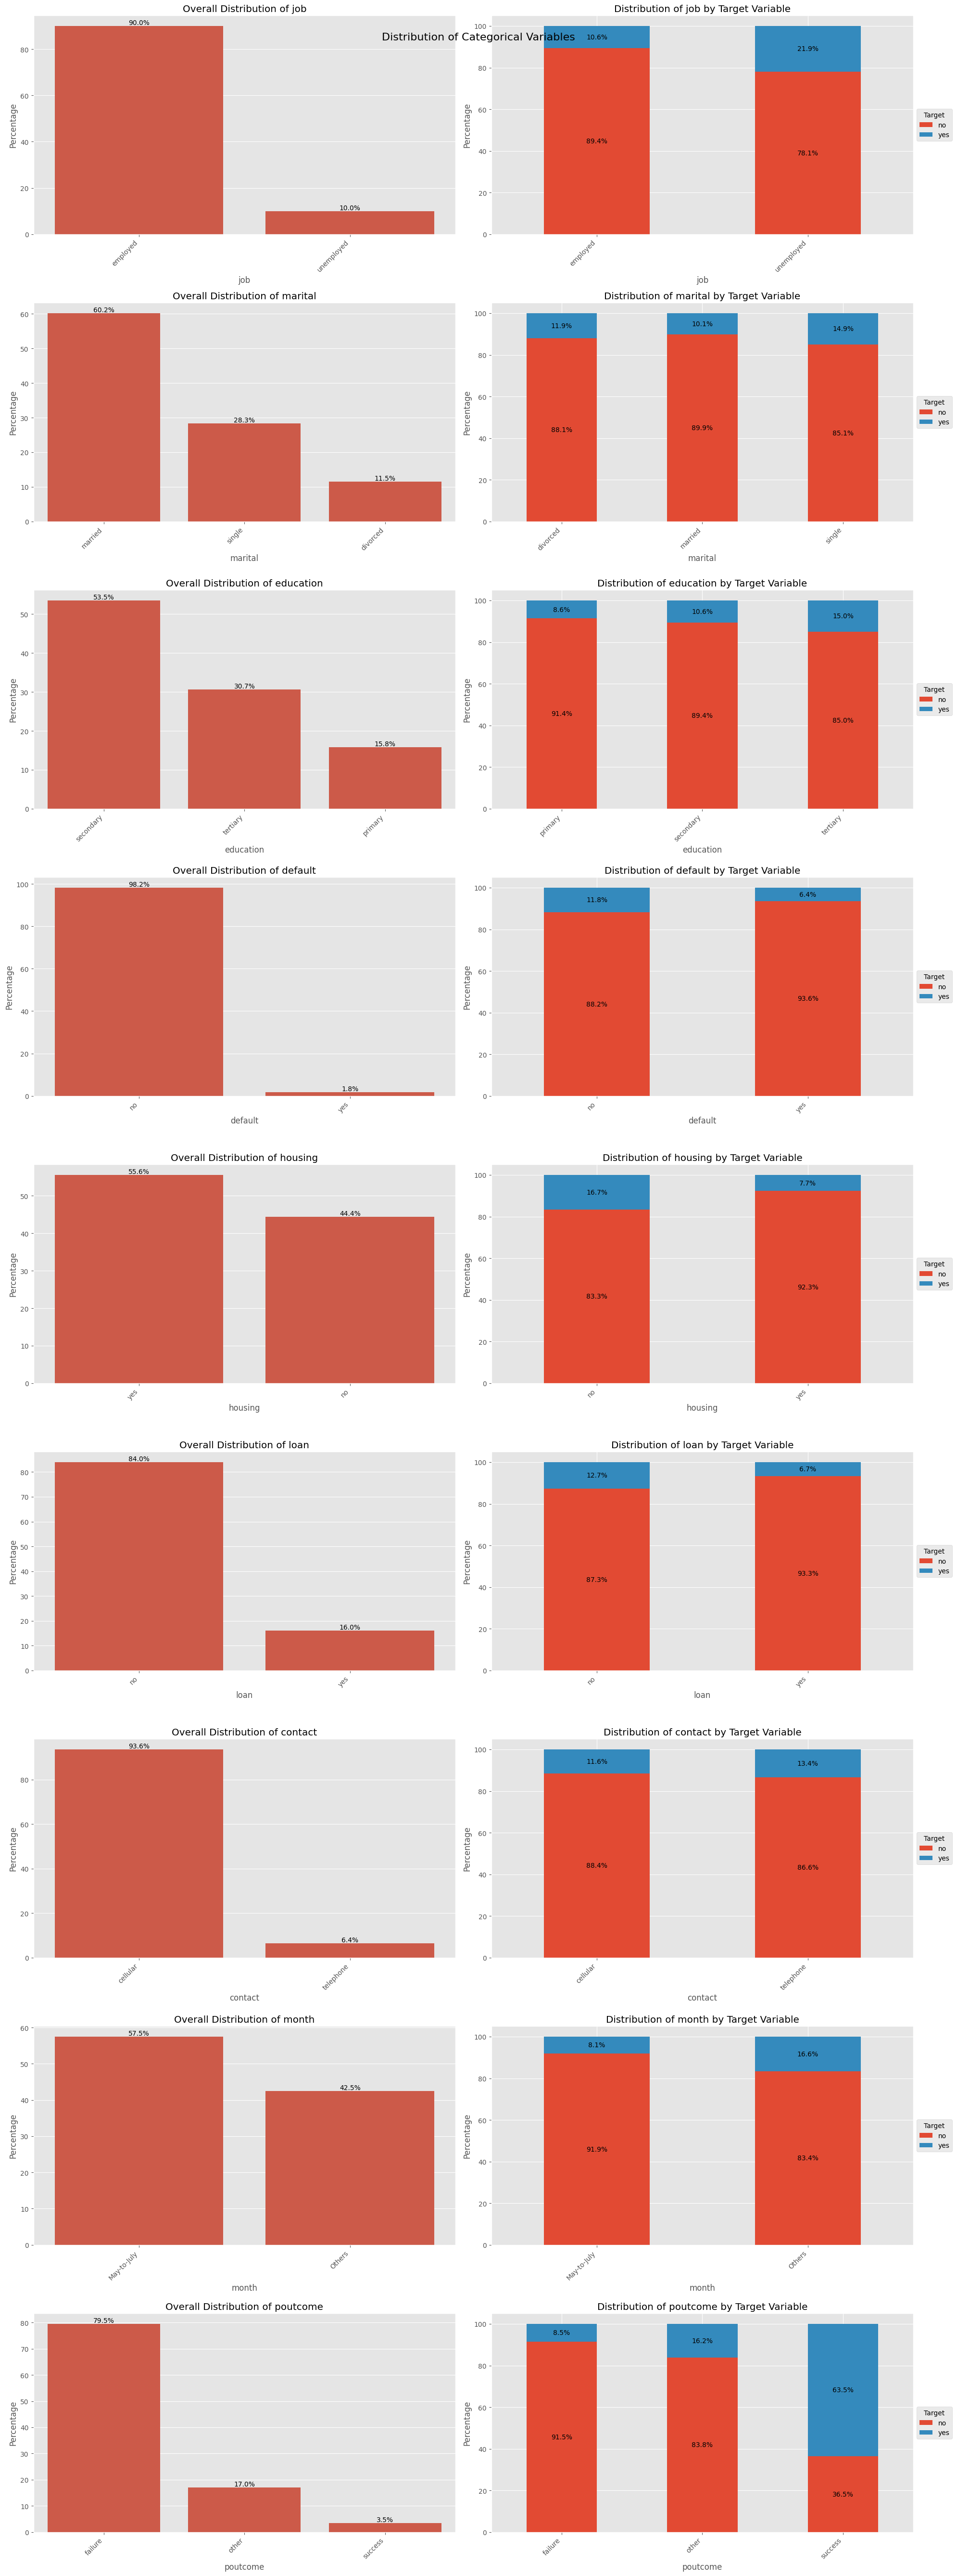


Detailed statistics for job:
Overall distribution:
  employed: 90.04%
  unemployed: 9.96%

Distribution by target variable:
y                  no        yes
job                             
employed    89.431533  10.568467
unemployed  78.091010  21.908990


Detailed statistics for marital:
Overall distribution:
  married: 60.19%
  single: 28.29%
  divorced: 11.52%

Distribution by target variable:
y                no        yes
marital                       
divorced  88.054542  11.945458
married   89.876534  10.123466
single    85.050821  14.949179


Detailed statistics for education:
Overall distribution:
  secondary: 53.52%
  tertiary: 30.68%
  primary: 15.80%

Distribution by target variable:
y                 no        yes
education                      
primary    91.373522   8.626478
secondary  89.440565  10.559435
tertiary   84.993610  15.006390


Detailed statistics for default:
Overall distribution:
  no: 98.20%
  yes: 1.80%

Distribution by target variable:
y               

In [79]:
# Redo the plots for each categorical variable

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove target variable from the list

# Set up the plot
n_cols = 2
n_rows = len(categorical_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Create plots for each categorical variable
for i, col in enumerate(categorical_cols):
    # Overall distribution
    ax1 = axes[i, 0]
    overall_dist = train_data[col].value_counts(normalize=True) * 100
    sns.barplot(x=overall_dist.index, y=overall_dist.values, ax=ax1)
    ax1.set_title(f'Overall Distribution of {col}')
    ax1.set_ylabel('Percentage')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels
    for j, v in enumerate(overall_dist.values):
        ax1.text(j, v, f'{v:.1f}%', ha='center', va='bottom')

    # Distribution by target variable
    ax2 = axes[i, 1]
    target_dist = pd.crosstab(train_data[col], train_data['y'], normalize='index') * 100
    target_dist.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title(f'Distribution of {col} by Target Variable')
    ax2.set_ylabel('Percentage')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.legend(title='Target', loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Add percentage labels
    for c in ax2.containers:
        ax2.bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

# Print detailed statistics
for col in categorical_cols:
    print(f"\nDetailed statistics for {col}:")
    
    # Overall distribution
    overall_dist = train_data[col].value_counts(normalize=True) * 100
    print("Overall distribution:")
    for category, percentage in overall_dist.items():
        print(f"  {category}: {percentage:.2f}%")
    
    # Distribution by target variable
    target_dist = pd.crosstab(train_data[col], train_data['y'], normalize='index') * 100
    print("\nDistribution by target variable:")
    print(target_dist)
    print("\n" + "="*50)

After applying KNN- imputation and regrouping, the distributions of features such as 'month', 'job', 'contact', and 'outcome' appear more balanced. 

We now need to futher assess the statistical significance of these features.

In [80]:
# Check the chi-square test

# Chi-Square Test
from scipy.stats import chi2_contingency

# List of selected categorical features
selected_features = ['poutcome','education', 'housing', 'contact','job','month']

# Function to perform chi-square test
def chi_square_test(data, feature, target):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value

# Perform chi-square tests and store results
results = []
for feature in selected_features:
    chi2, p_value = chi_square_test(train_data, feature, 'y')
    results.append({'Feature': feature, 'Chi-Square': chi2, 'P-value': p_value})

# Convert results to DataFrame and sort by chi-square value
results_df = pd.DataFrame(results).sort_values('Chi-Square', ascending=False)

# Print results
print("Chi-Square Test Results:")
print(results_df.to_string(index=False))

Chi-Square Test Results:
  Feature  Chi-Square       P-value
 poutcome 4572.056135  0.000000e+00
  housing  874.822449 2.918798e-192
    month  779.777049 1.345752e-171
      job  503.886839 1.356061e-111
education  233.746518  1.748190e-51
  contact    9.004472  2.693197e-03


To maintain computational simplicity, we will use only 'poutcome', 'housing', 'month', and 'job' as the categorical features in our machine learning models, even though all features listed have a statistically significant association with the target variable, with varying degrees of influence.

5. Explore Numerical Features

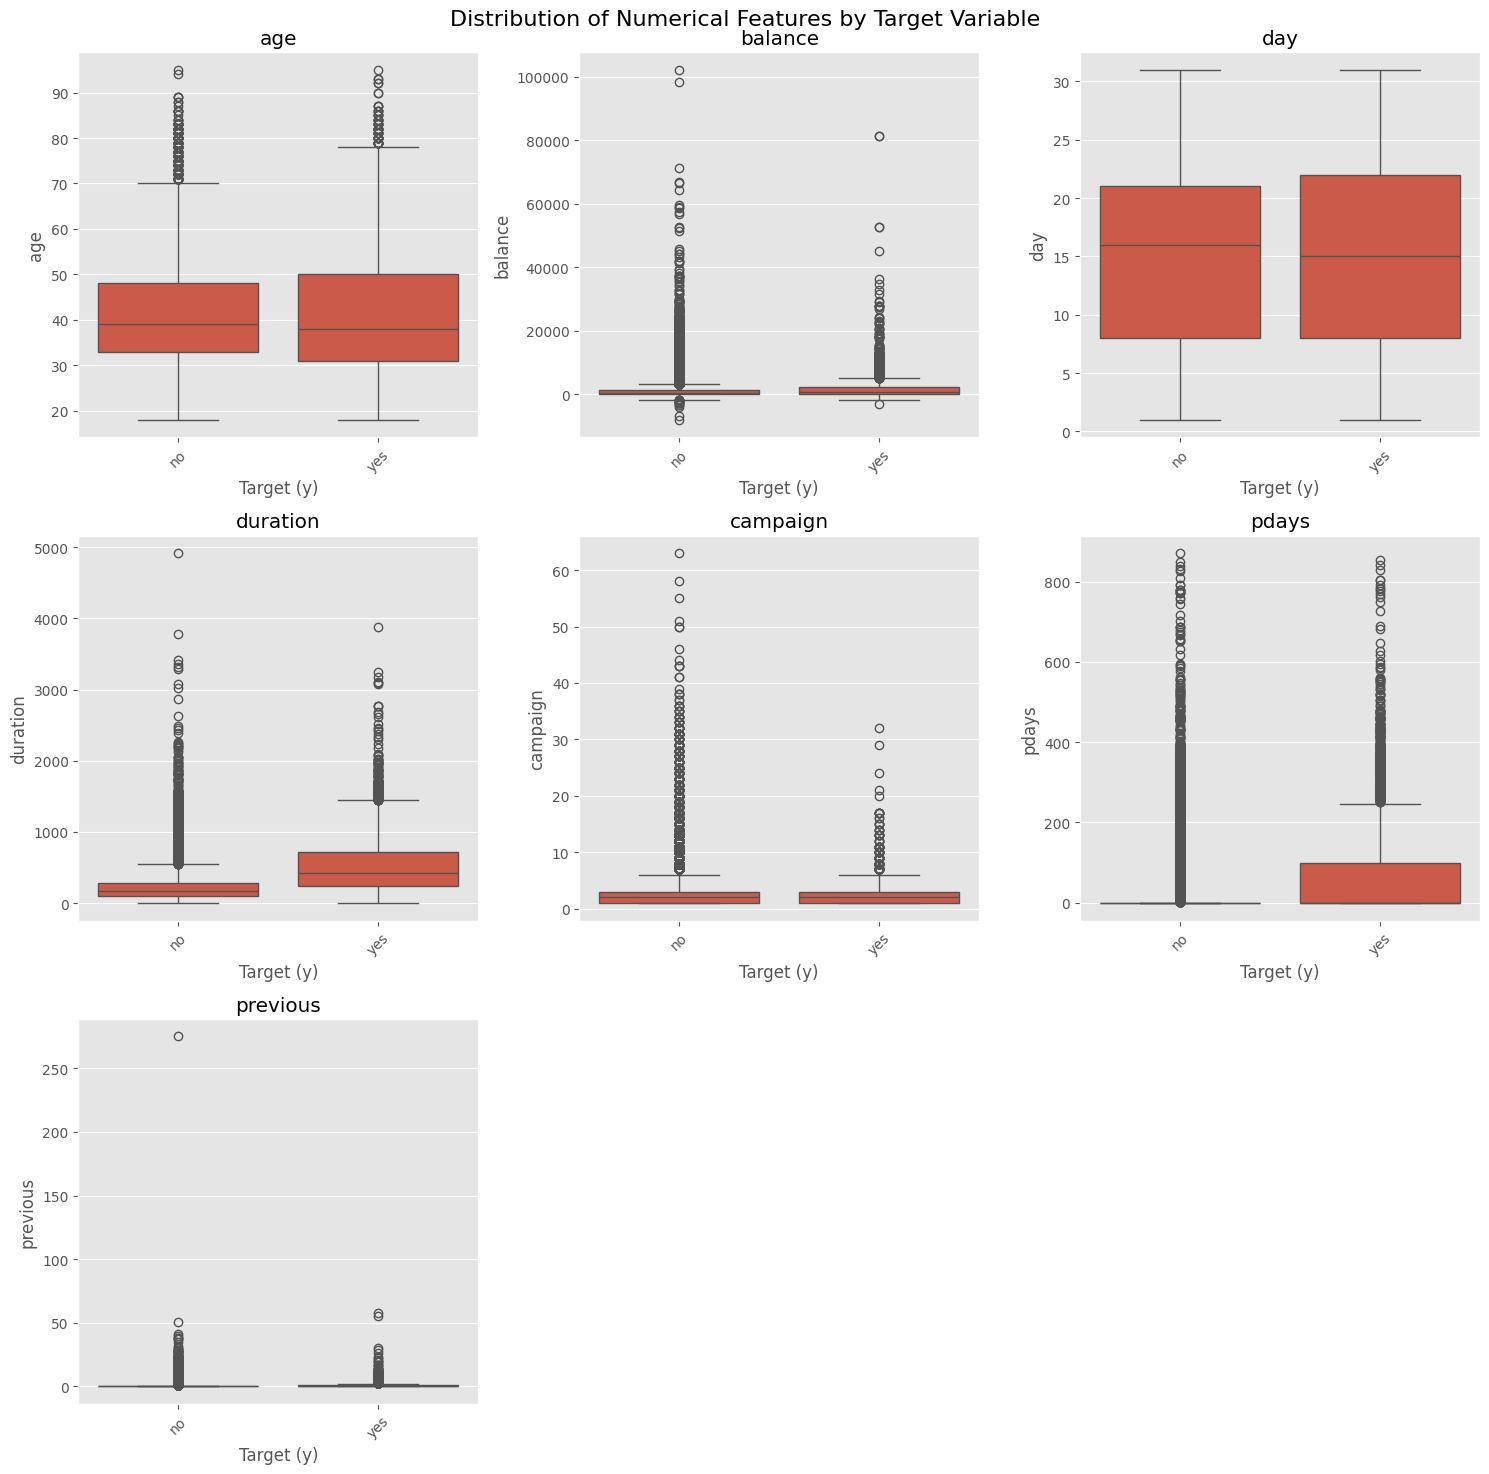


Summary Statistics for Numerical Features:

age:
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0

balance:
       count         mean          std     min    25%    50%     75%       max
y                                                                             
no   39922.0  1303.714969  2974.195473 -8019.0   58.0  417.0  1345.0  102127.0
yes   5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   81204.0

day:
       count       mean       std  min  25%   50%   75%   max
y                                                            
no   39922.0  15.892290  8.294728  1.0  8.0  16.0  21.0  31.0
yes   5289.0  15.158253  8.501875  1.0  8.0  15.0  22.0  31.0

duration:
       count        mean         std  min    25%    50%    75%     max
y                           

In [81]:
# Boxplots for all numerical features

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows and columns for the subplot grid
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Distribution of Numerical Features by Target Variable', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='y', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Target (y)')
    axes[i].set_ylabel(feature)
    
    # Rotate x-axis labels if they're overlapping
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Numerical Features:")
for feature in numerical_features:
    print(f"\n{feature}:")
    print(train_data.groupby('y')[feature].describe())

<Figure size 2000x2000 with 0 Axes>

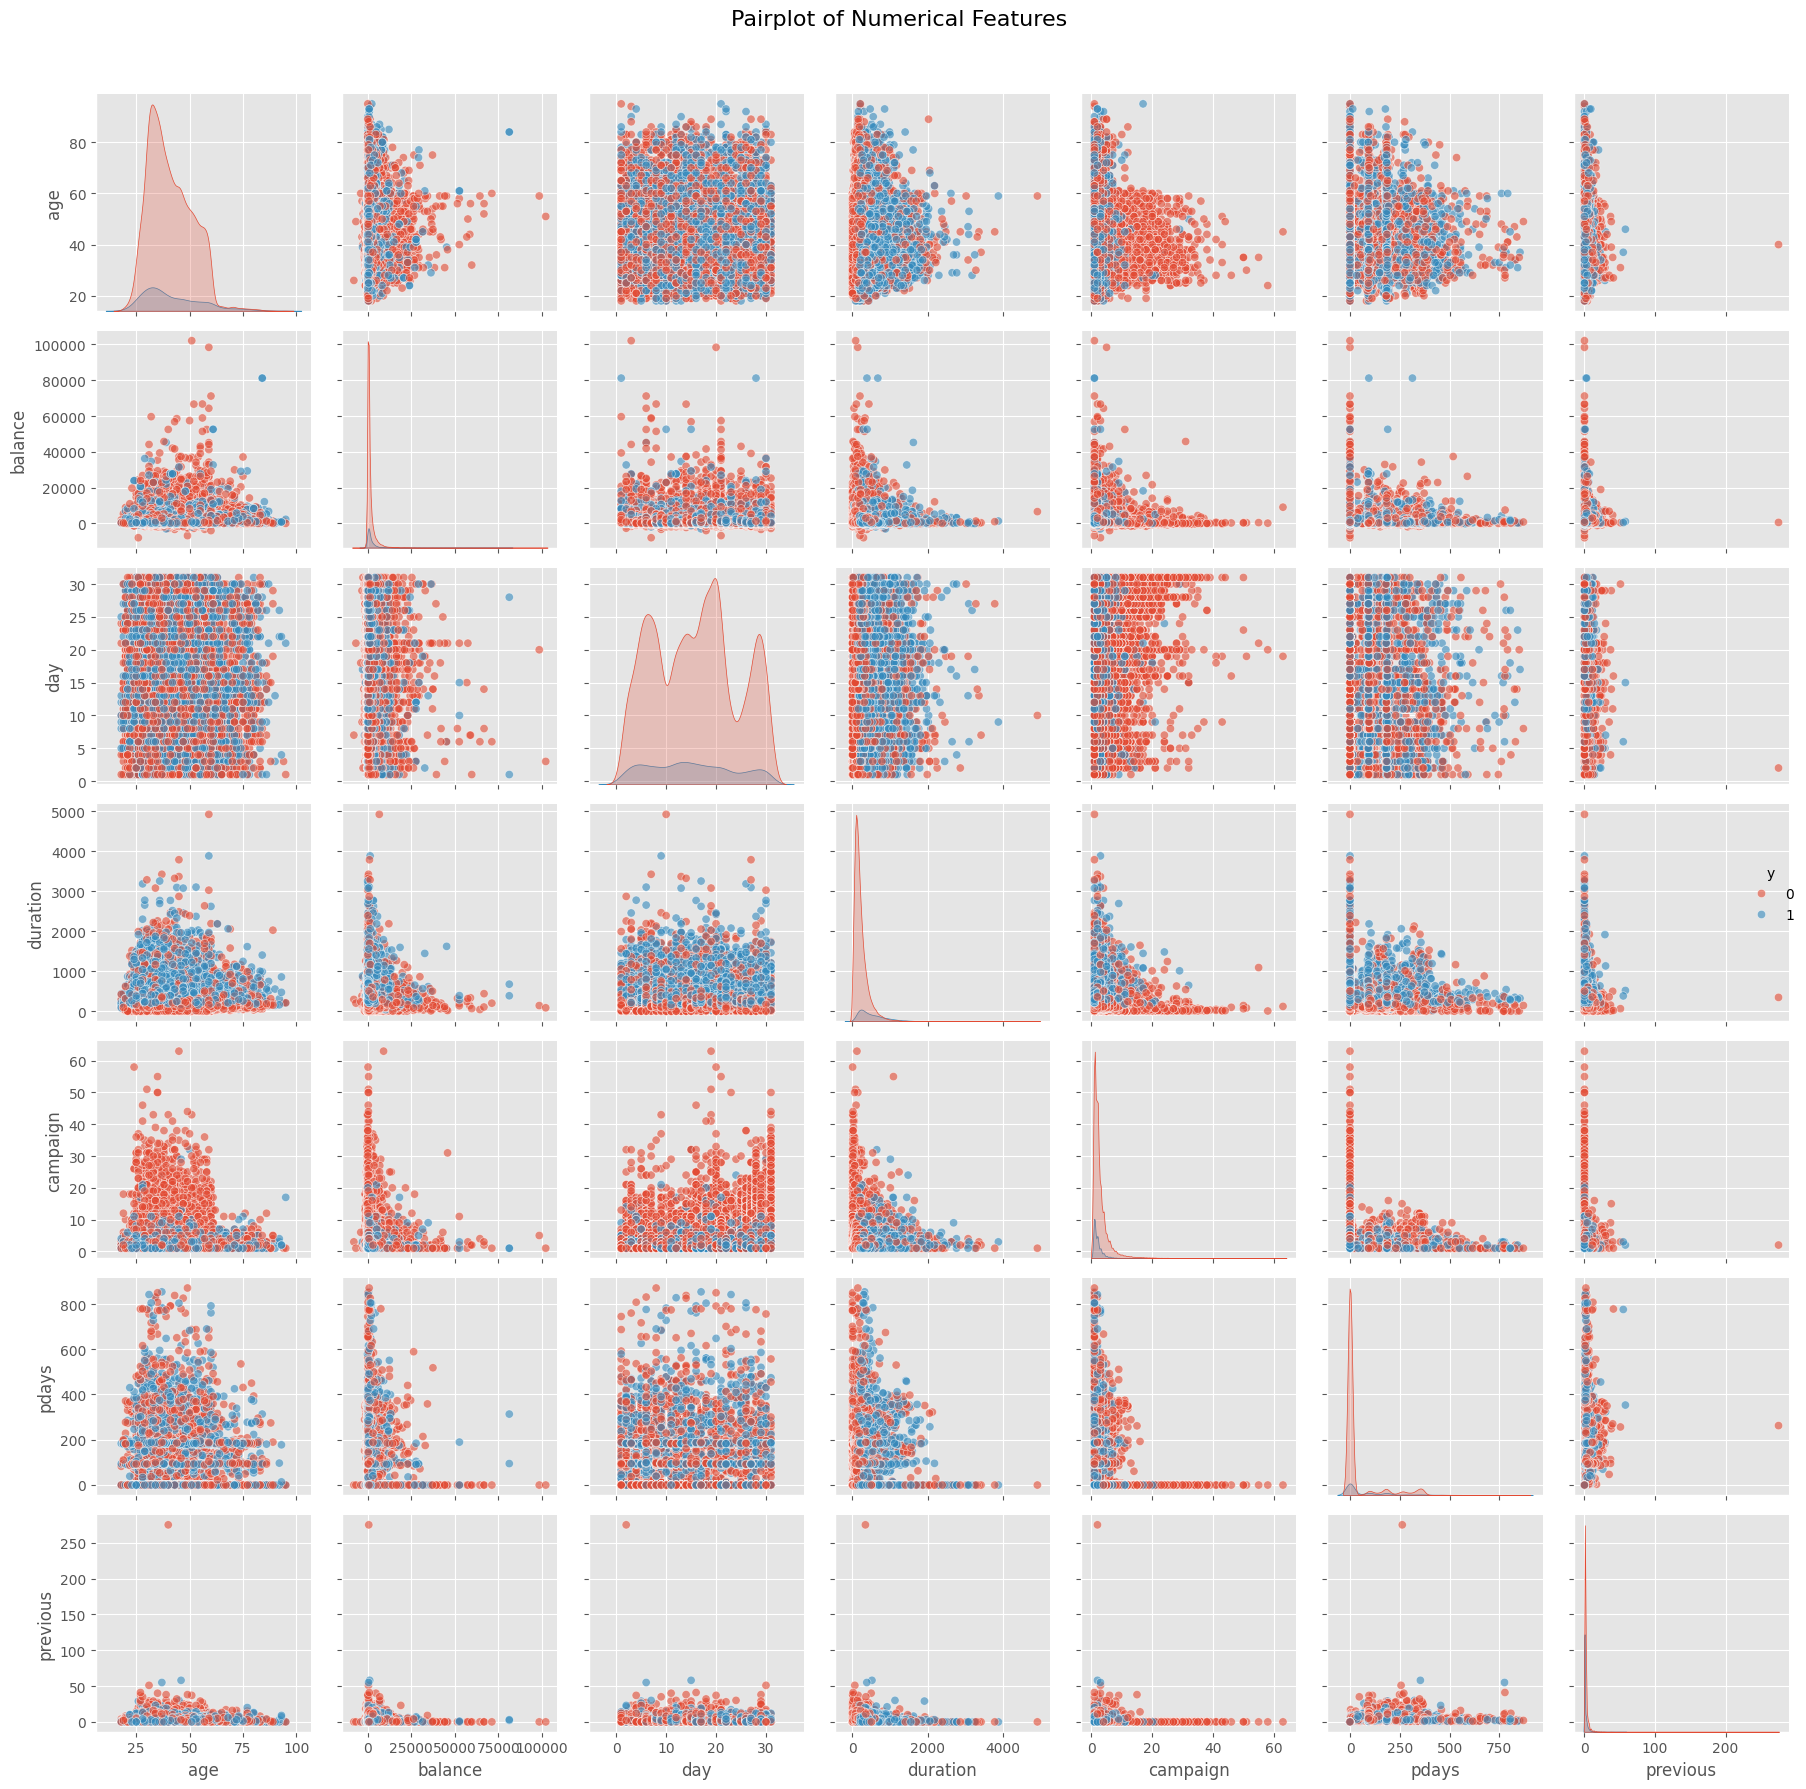


Correlations with target variable ('y'):
y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64


In [82]:
# Pairplot for numerical features

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Create a copy of the data to avoid modifying the original
data_for_plot = train_data.copy()

# Handle the 'y' column
if 'y' in train_data.columns:
    if train_data['y'].dtype == 'object':
        # Convert 'y' to numeric (assuming 'yes' = 1, 'no' = 0)
        data_for_plot['y'] = (train_data['y'] == 'yes').astype(int)
    numerical_features.append('y')
else:
    print("Warning: 'y' column not found in the dataset.")

# Ensure all selected features are numeric
data_for_plot = data_for_plot[numerical_features].apply(pd.to_numeric, errors='coerce')

# Drop any columns that might have become all NaN after conversion
data_for_plot = data_for_plot.dropna(axis=1, how='all')

# Update numerical_features list to match the columns in data_for_plot
numerical_features = data_for_plot.columns.tolist()

# Set up the pairplot
plt.figure(figsize=(20, 20))
sns.pairplot(data_for_plot, hue='y' if 'y' in numerical_features else None, 
             diag_kind='kde', plot_kws={'alpha': 0.6})

# Set the title
plt.suptitle('Pairplot of Numerical Features', fontsize=16, y=1.02)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the correlation values with 'y'
if 'y' in numerical_features:
    correlations_with_target = data_for_plot.corr()['y'].sort_values(ascending=False)
    print("\nCorrelations with target variable ('y'):")
    print(correlations_with_target)
else:
    print("\nWarning: 'y' column not found. Cannot compute correlations with target variable.")

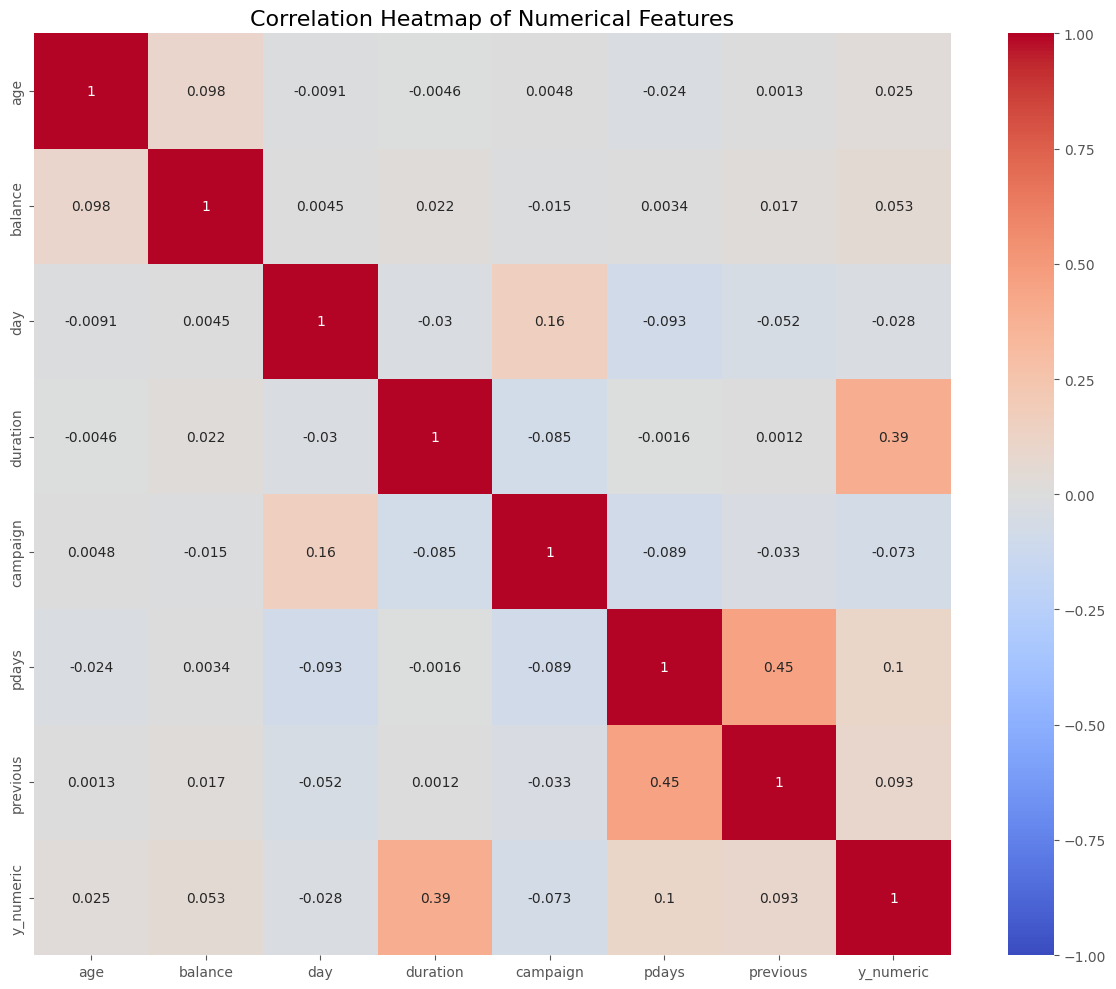


Correlations with target variable ('y'):
y_numeric    1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
balance      0.052838
age          0.025155
day         -0.028348
campaign    -0.073172
Name: y_numeric, dtype: float64


In [83]:
# Heatmap for all numerical features

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Ensure 'y' is included in the correlation matrix
if 'y' not in numerical_features:
    # Convert 'y' to numeric (assuming 'yes' = 1, 'no' = 0)
    train_data['y_numeric'] = (train_data['y'] == 'yes').astype(int)
    numerical_features.append('y_numeric')

# Calculate the correlation matrix
correlation_matrix = train_data[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the correlation values with 'y' or 'y_numeric'
target_col = 'y_numeric' if 'y_numeric' in numerical_features else 'y'
correlations_with_target = correlation_matrix[target_col].sort_values(ascending=False)
print("\nCorrelations with target variable ('y'):")
print(correlations_with_target)

Based on the heatmap & pairplot generated, we observe that numerical features such as 'duration', 'pdays', 'campaign', 'balance' and 'previous' display noticable correlations in their relationships with the target variable 'y'. 

We need to further examine the statistical significance of those correlations.

In [84]:
# T-Test
from scipy import stats

# List of selected numerical features
selected_features = ['duration', 'previous','pdays']

# Function to perform t-test
def perform_t_test(data, feature, target):
    group1 = data[data[target] == 'yes'][feature]
    group2 = data[data[target] == 'no'][feature]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value

# Perform t-tests and store results
results = []
for feature in selected_features:
    t_stat, p_value = perform_t_test(train_data, feature, 'y')
    mean_yes = train_data[train_data['y'] == 'yes'][feature].mean()
    mean_no = train_data[train_data['y'] == 'no'][feature].mean()
    results.append({
        'Feature': feature,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Mean (y=yes)': mean_yes,
        'Mean (y=no)': mean_no
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("T-Test Results:")
print(results_df.to_string(index=False))

T-Test Results:
 Feature  T-statistic       P-value  Mean (y=yes)  Mean (y=no)
duration    91.289436  0.000000e+00    537.294574   221.182806
previous    19.910901  7.801830e-88      1.170354     0.502154
   pdays    22.151672 3.790553e-108     68.702968    36.421372


Based on the t-test results, all selected numerical features show a statistically significant correlation when compared with 'y'.

6. Create the prepocessing pipeline

In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn

# Select features
numerical_features = ['duration', 'previous', 'pdays']
categorical_features = ['month', 'housing', 'poutcome','job']

# Separate features and target
X = train_data[numerical_features + categorical_features]
y = train_data['y']

# Check scikit-learn version and create appropriate OneHotEncoder
sklearn_version = sklearn.__version__
if sklearn_version >= '0.23.0':
    onehot = OneHotEncoder(drop='first', sparse_output=False)
else:
    onehot = OneHotEncoder(drop='first', sparse=False)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', onehot, categorical_features)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat']
if hasattr(onehot_encoder, 'get_feature_names_out'):
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
else:
    cat_feature_names = onehot_encoder.get_feature_names(categorical_features)
feature_names = numerical_features + list(cat_feature_names)

# Create a new dataframe with preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display info about the preprocessed data
print("Shape of preprocessed data:", X_preprocessed_df.shape)
print("\nFirst few rows of preprocessed data:")
print(X_preprocessed_df.head())

print("\nSummary statistics of preprocessed data:")
print(X_preprocessed_df.describe())

# Print feature names for later use
print("\nFeature names for model input:")
print(feature_names)

# Prepare final dataset with preprocessed features and target
final_train_data = X_preprocessed_df.copy()
final_train_data['target'] = y

print("\nFinal dataset shape:", final_train_data.shape)
print("\nFirst few rows of final dataset:")
print(final_train_data.head())

Shape of preprocessed data: (45211, 8)

First few rows of preprocessed data:
   duration  previous  pdays  month_Others  housing_yes  poutcome_other  \
0  0.053070       0.0    0.0           0.0          1.0             0.0   
1  0.030704       0.0    0.0           0.0          1.0             0.0   
2  0.015453       0.0    0.0           0.0          1.0             0.0   
3  0.018707       0.0    0.0           0.0          1.0             0.0   
4  0.040260       0.0    0.0           0.0          0.0             0.0   

   poutcome_success  job_unemployed  
0               0.0             0.0  
1               0.0             0.0  
2               0.0             0.0  
3               0.0             0.0  
4               0.0             0.0  

Summary statistics of preprocessed data:
           duration      previous         pdays  month_Others   housing_yes  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.052494      0.002110      0.047

We applied scaling and encoding transformations in this preprocessing pipeline to prepare the data for machine learning models. For numerical features, such as 'duration', 'previous', and 'pdays', we used MinMaxScaler to normalize them to a range between 0 and 1, ensuring that no feature dominates due to its scale. For categorical features like 'month', 'housing', 'poutcome', and 'job', we applied OneHotEncoder to convert them into binary columns. This step is crucial because machine learning models require numerical inputs, and OneHotEncoder prevents the model from assuming any ordinal relationship between the categories. We ensured compatibility across different versions of scikit-learn by using conditionals for OneHotEncoder's get_feature_names_out method. After transforming the data, we created a new dataframe with the processed features and added the target variable 'y' back into the dataset. This approach ensures that the model can effectively interpret numerical and categorical features, while scaling and encoding prevent issues such as multicollinearity or bias toward features with more extensive numerical ranges.

# Part 2: Build Baseline Models

1. Cross-validation for baseline models

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import TomekLinks

# Separate features and target
X = final_train_data.drop('target', axis=1)
y = final_train_data['target']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform initial train-test split
X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Tomek Links to the training data
tl = TomekLinks(sampling_strategy='majority')
X_train, y_train = tl.fit_resample(X_train_imbalanced, y_train_imbalanced)

# Print class distributions
print("Original training set shape:", np.bincount(y_train_imbalanced))
print("After Tomek Links undersampling:", np.bincount(y_train))
print("Test set shape:", np.bincount(y_test))

# Print shapes of final datasets
print("\nFinal shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\nData preparation complete. X_train and y_train are now undersampled using Tomek Links and ready for model building.")

# Perform cross-validation
print("\nPerforming cross-validation:")

# Initialize models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

# Perform 5-fold cross-validation for Logistic Regression
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1')
print("Logistic Regression - Cross-validation F1 scores:", logreg_scores)
print("Logistic Regression - Mean F1 score:", logreg_scores.mean())
print("Logistic Regression - Standard deviation:", logreg_scores.std())

# Perform 5-fold cross-validation for KNN
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
print("\nKNN - Cross-validation F1 scores:", knn_scores)
print("KNN - Mean F1 score:", knn_scores.mean())
print("KNN - Standard deviation:", knn_scores.std())

# Compare models
if logreg_scores.mean() > knn_scores.mean():
    print("\nLogistic Regression performs better in cross-validation.")
elif knn_scores.mean() > logreg_scores.mean():
    print("\nKNN performs better in cross-validation.")
else:
    print("\nBoth models perform equally in cross-validation.")

Original training set shape: [31970  4198]
After Tomek Links undersampling: [31355  4198]
Test set shape: [7952 1091]

Final shapes:
X_train shape: (35553, 8)
y_train shape: (35553,)
X_test shape: (9043, 8)
y_test shape: (9043,)

Data preparation complete. X_train and y_train are now undersampled using Tomek Links and ready for model building.

Performing cross-validation:
Logistic Regression - Cross-validation F1 scores: [0.43918367 0.44609053 0.46751189 0.44874899 0.45718901]
Logistic Regression - Mean F1 score: 0.45174482000113364
Logistic Regression - Standard deviation: 0.009766964247495265

KNN - Cross-validation F1 scores: [0.50142045 0.50177179 0.5087108  0.50555556 0.51753156]
KNN - Mean F1 score: 0.5069980322703108
KNN - Standard deviation: 0.005905800637077578

KNN performs better in cross-validation.


In order to mitigate the data imbalance, we undersampled the majority class of the train data after the train-test split, while kept the test data untouched. The undersampling technique we used is Tomek Links, which are pairs of instances that are nearest neighbors and are very close to each other but belong to different classes. This techqunique removes majority class samples that form Tomek links with minority class instances. By removing these majority class instances, the decision boundary becomes clearer, and the models can focus on the difficult minority examples


This code prepares a machine learning pipeline by separating features and target data, applying label encoding to the target, and splitting the dataset into training and test sets. It uses Tomek Links to undersample the majority class in the training data to handle class imbalance. Then, two models (Logistic Regression and KNN) are evaluated using 5-fold cross-validation, with F1 scores calculated for each. The code prints the class distributions, dataset shapes, and cross-validation results, ultimately comparing the models' mean F1 scores to determine which performs better.

2.1 LogReg

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.4713598130068079

Performance Scores:
Accuracy: 0.8957
Precision: 0.6164
Recall: 0.3593
F1 Score: 0.4540
ROC AUC Score: 0.8822


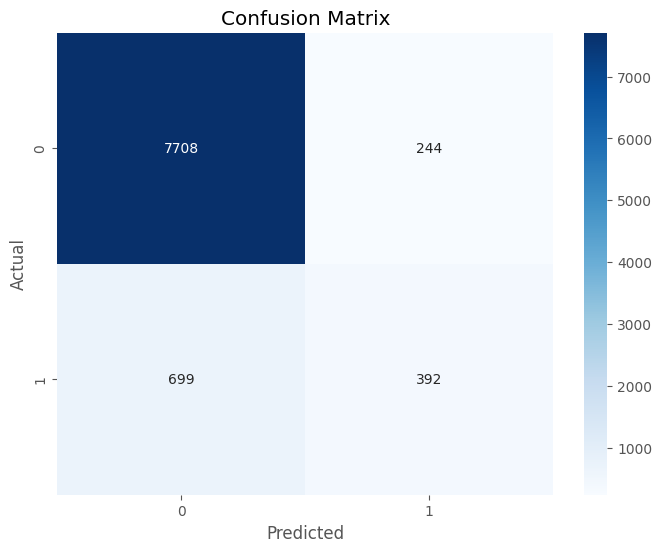


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.36      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



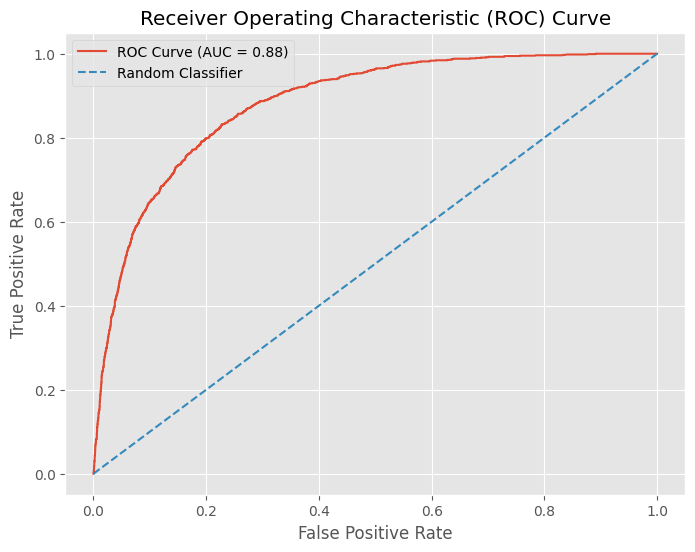


Timing Information:
Total time to run grid search: 15.70 seconds
Time per fit: 0.65 seconds

Top 10 most important features:
            feature  importance
0          duration   22.273404
6  poutcome_success    2.914739
1          previous    2.575487
2             pdays    1.932237
4       housing_yes    0.890320
5    poutcome_other    0.701478
3      month_Others    0.670677
7    job_unemployed    0.524263


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import time

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the grid search object
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logreg.predict(X_test)
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_fits = len(grid_search.cv_results_['mean_fit_time'])
time_per_fit = total_time / n_fits

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per fit: {time_per_fit:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(best_logreg.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

We will attempt to adjust the threshold of each model, where possible, in order to achieve the highest F1 score. The justification and evaluation of the outcome will be provided later.

2.2 LogReg (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.2413
Optimal F1 Score: 0.5518

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7952
           1       0.52      0.59      0.55      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.76      0.74      9043
weighted avg       0.89      0.88      0.89      9043



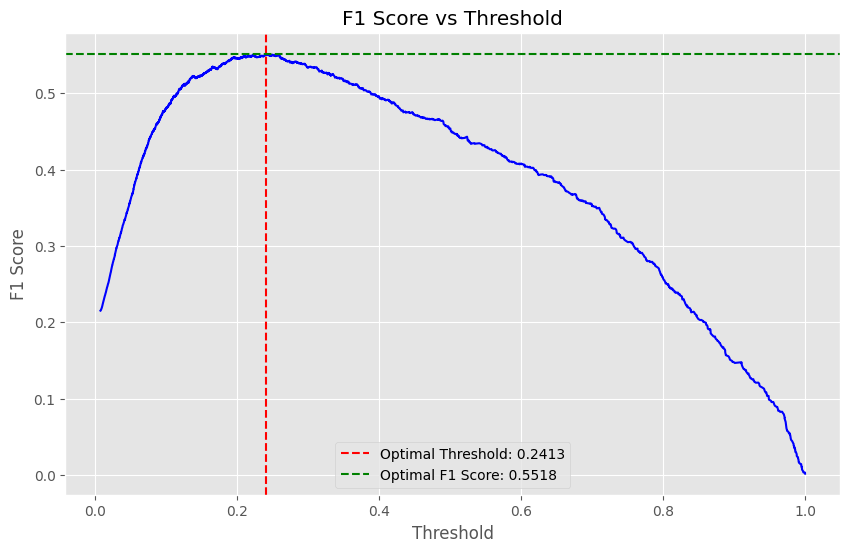

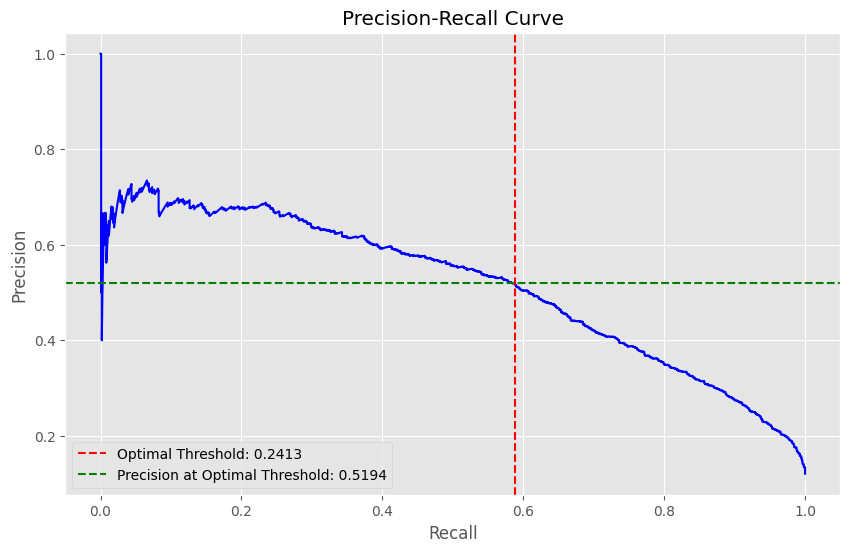


Default Threshold (0.5) F1 Score: 0.4540
Improvement in F1 Score: 0.0978

Metrics at threshold 0.5:
Accuracy: 0.8957
Precision: 0.6164
Recall: 0.3593
F1 Score: 0.4540
ROC AUC Score: 0.8822

Metrics at threshold 0.2413077765451066:
Accuracy: 0.8847
Precision: 0.5194
Recall: 0.5885
F1 Score: 0.5518
ROC AUC Score: 0.8822


In [88]:
from sklearn.metrics import f1_score, precision_recall_curve

# Get predicted probabilities
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
from sklearn.metrics import classification_report
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Calculate and print additional metrics for comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

At the standard threshold of 0.5, the model achieves high accuracy (0.8957) but struggles with recall (0.3593), indicating it may be missing a significant portion of positive cases. When the threshold is lowered to approximately 0.2413, there's a slight decrease in accuracy (0.8847) and precision (0.5194), but a substantial improvement in recall (0.5885). This results in a better overall F1 Score (0.5518 vs 0.4540), suggesting improved balance between precision and recall. The ROC AUC Score remains constant at 0.8822 for both thresholds, indicating good overall discriminative ability of the model regardless of the chosen threshold.

3.1 KNN

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.5187800794916206

Performance Scores:
Accuracy: 0.8867
Precision: 0.5365
Recall: 0.4445
F1 Score: 0.4862
ROC AUC Score: 0.7915


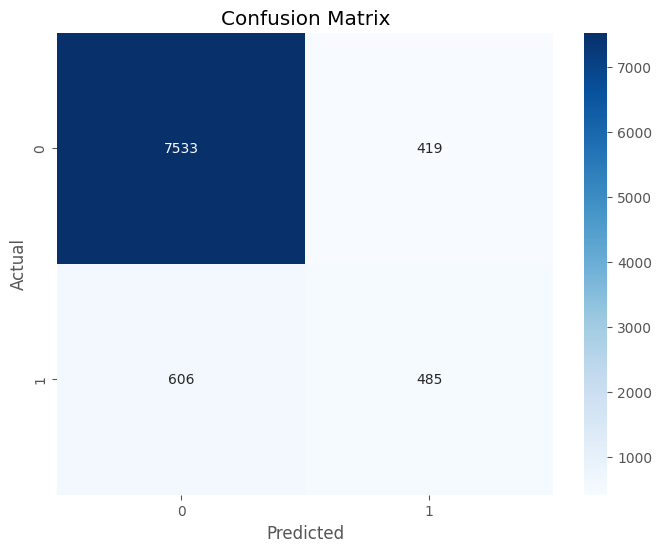


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.54      0.44      0.49      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.70      0.71      9043
weighted avg       0.88      0.89      0.88      9043



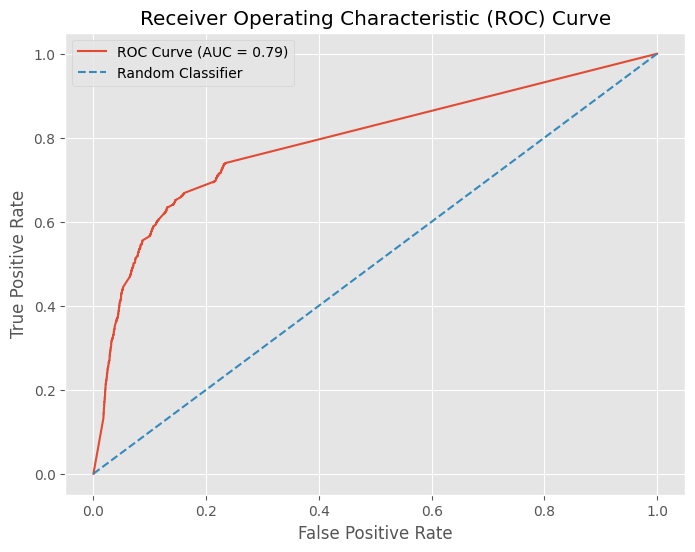


Timing Information:
Total time to run grid search: 16.18 seconds
Time per fit: 0.58 seconds

Top 10 potentially important features (based on feature scaling):
                           feature  importance
housing_yes            housing_yes    0.496487
month_Others          month_Others    0.493671
poutcome_other      poutcome_other    0.375212
job_unemployed      job_unemployed    0.295627
poutcome_success  poutcome_success    0.176172
pdays                        pdays    0.113193
duration                  duration    0.050804
previous                  previous    0.008612


In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the grid search object
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_fits = len(grid_search.cv_results_['mean_fit_time'])
time_per_fit = total_time / n_fits

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per fit: {time_per_fit:.2f} seconds")

# Feature Importance (for KNN, we'll use a simple method based on feature scaling)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.std(X_train, axis=0)  # Features with higher variance might be more important
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 potentially important features (based on feature scaling):")
print(feature_importance.head(10))

3.2 KNN (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.3342
Optimal F1 Score: 0.5075

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7952
           1       0.47      0.56      0.51      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.73      0.72      9043
weighted avg       0.88      0.87      0.87      9043



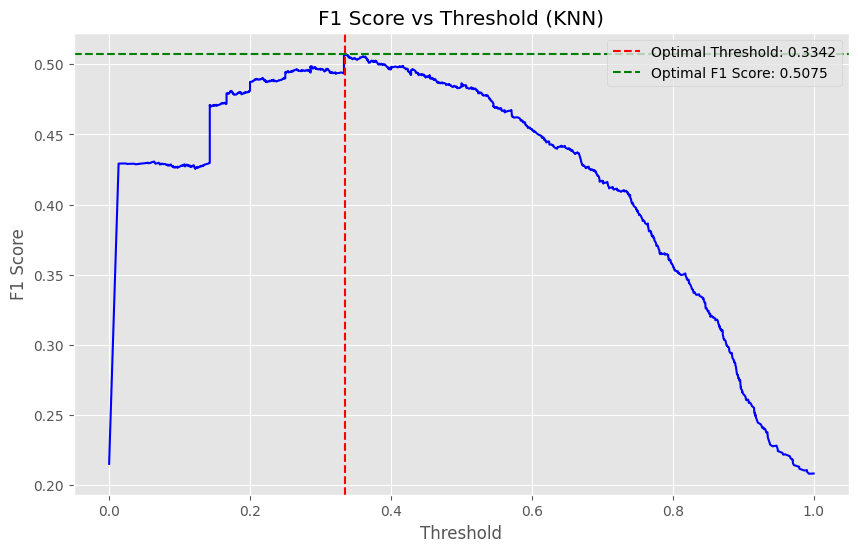

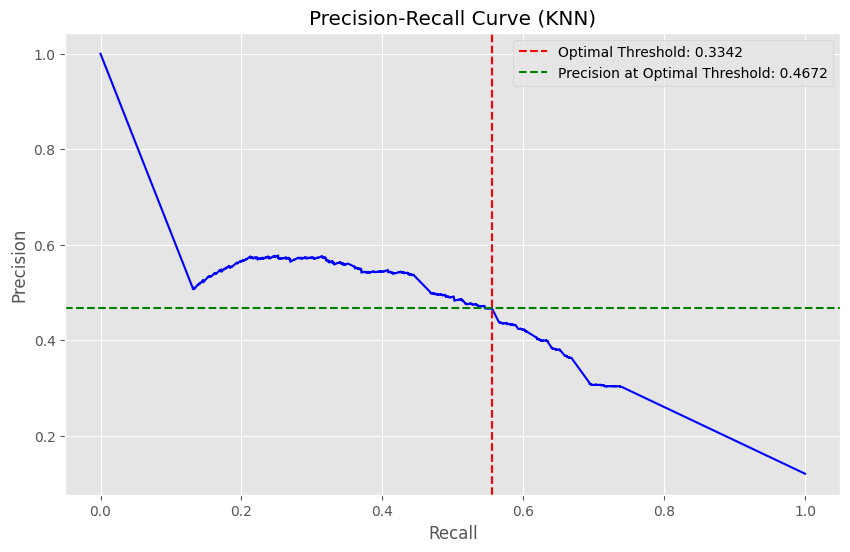


Default Threshold (0.5) F1 Score: 0.4839
Improvement in F1 Score: 0.0236

Metrics at threshold 0.5:
Accuracy: 0.8795
Precision: 0.5005
Recall: 0.4684
F1 Score: 0.4839
ROC AUC Score: 0.7915

Metrics at threshold 0.3342008015385983:
Accuracy: 0.8700
Precision: 0.4672
Recall: 0.5555
F1 Score: 0.5075
ROC AUC Score: 0.7915

Unable to visualize decision boundaries: more than 2 features present.


In [90]:
# Get predicted probabilities
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (KNN)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Visualize decision boundaries (if possible)
if X_test.shape[1] == 2:  # Only if we have 2 features
    plt.figure(figsize=(10, 8))
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = best_knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
    plt.colorbar(scatter)
    plt.title("KNN Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("\nUnable to visualize decision boundaries: more than 2 features present.")

At the default threshold of 0.5, the model shows moderate performance with an accuracy of 0.8795, precision of 0.5005, recall of 0.4684, and an F1 Score of 0.4839. When the threshold is adjusted to approximately 0.3342, there's a slight decrease in accuracy (0.8700) and precision (0.4672), but a notable improvement in recall (0.5555). This adjustment results in an improved F1 Score of 0.5075, representing an increase of 0.0236 from the default threshold. The ROC AUC Score remains constant at 0.7915 for both thresholds, indicating consistent overall discriminative ability. This suggests that lowering the classification threshold for this KNN model leads to a better balance between precision and recall, slightly favoring recall.

# Part 3: Ensemble Modelling

1. Cross-Validation for Emsemble Models

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

Cross-validation F1 Scores:
Random Forest: Mean = 0.5212, Std = 0.0115
AdaBoost: Mean = 0.4906, Std = 0.0065
Bagging: Mean = 0.4979, Std = 0.0129
Voting: Mean = 0.5261, Std = 0.0145


c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Test Set F1 Scores:
Random Forest: 0.4826
AdaBoost: 0.4650
Bagging: 0.4903
Voting: 0.4950


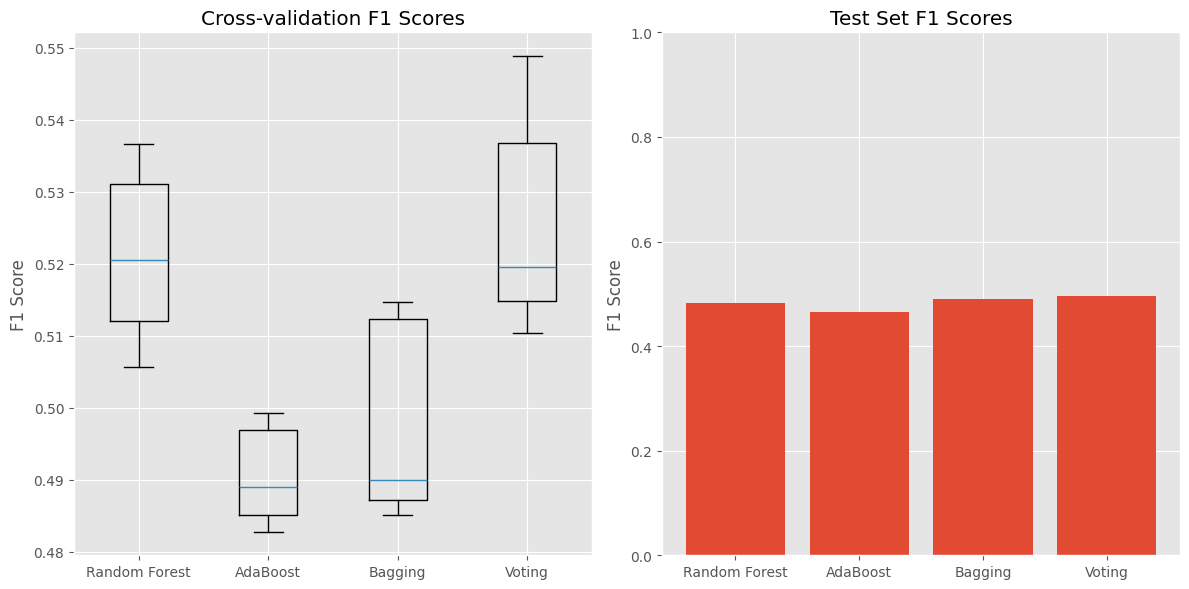


Best performing model: Voting

Voting Classifier does not have a straightforward feature importance measure.


In [91]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import __version__ as sklearn_version

# Initialize models
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

# Check scikit-learn version for BaggingClassifier initialization
if sklearn_version >= '0.22':
    bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
else:
    bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

voting = VotingClassifier(estimators=[('rf', rf), ('ada', ada), ('bag', bag)], voting='soft')

models = [rf, ada, bag, voting]
model_names = ['Random Forest', 'AdaBoost', 'Bagging', 'Voting']

# Perform cross-validation
cv_scores = {}
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    cv_scores[name] = scores

# Print cross-validation results
print("Cross-validation F1 Scores:")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

# Train models on the entire training set and evaluate on test set
test_scores = {}
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_scores[name] = f1_score(y_test, y_pred)

print("\nTest Set F1 Scores:")
for name, score in test_scores.items():
    print(f"{name}: {score:.4f}")

# Visualize results
plt.figure(figsize=(12, 6))

# Plot cross-validation scores
plt.subplot(1, 2, 1)
plt.boxplot([cv_scores[name] for name in model_names], labels=model_names)
plt.title('Cross-validation F1 Scores')
plt.ylabel('F1 Score')

# Plot test set scores
plt.subplot(1, 2, 2)
plt.bar(model_names, [test_scores[name] for name in model_names])
plt.title('Test Set F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Identify the best model based on test set performance
best_model_name = max(test_scores, key=test_scores.get)
best_model = models[model_names.index(best_model_name)]

print(f"\nBest performing model: {best_model_name}")

# Feature importance for the best model (if it's not Voting Classifier)
if best_model_name != 'Voting':
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\nTop 10 important features for {best_model_name}:")
        print(feature_importance.head(10))
    else:
        print(f"\n{best_model_name} does not have built-in feature importance.")
else:
    print("\nVoting Classifier does not have a straightforward feature importance measure.")

2.1 Random Forest

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
288 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
124 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score: 0.5204163837033794

Performance Scores:
Accuracy: 0.8964
Precision: 0.6032
Recall: 0.4125
F1 Score: 0.4899
ROC AUC Score: 0.8901


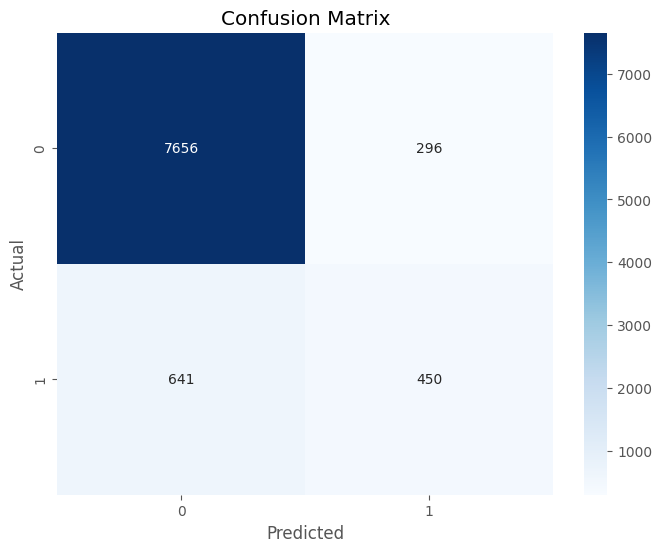


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.60      0.41      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.69      0.72      9043
weighted avg       0.88      0.90      0.89      9043



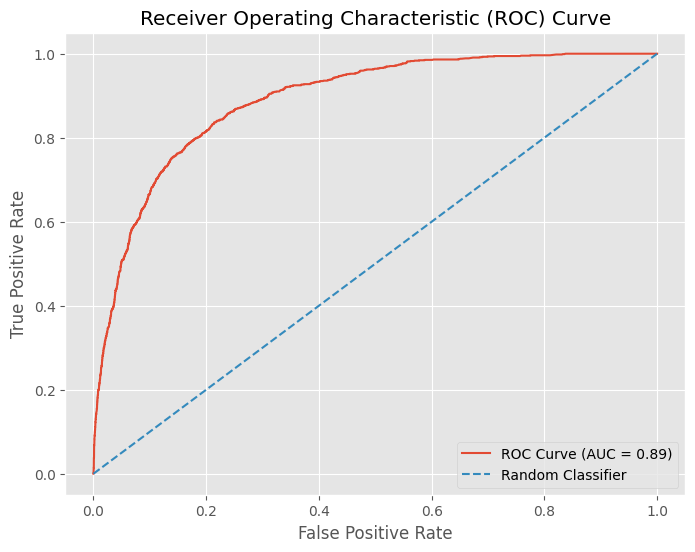


Timing Information:
Total time to run grid search: 177.34 seconds
Time per iteration: 0.92 seconds

Top 10 most important features:
            feature  importance
0          duration    0.571404
6  poutcome_success    0.151208
2             pdays    0.106484
1          previous    0.050332
4       housing_yes    0.049770
3      month_Others    0.028789
5    poutcome_other    0.022534
7    job_unemployed    0.019481


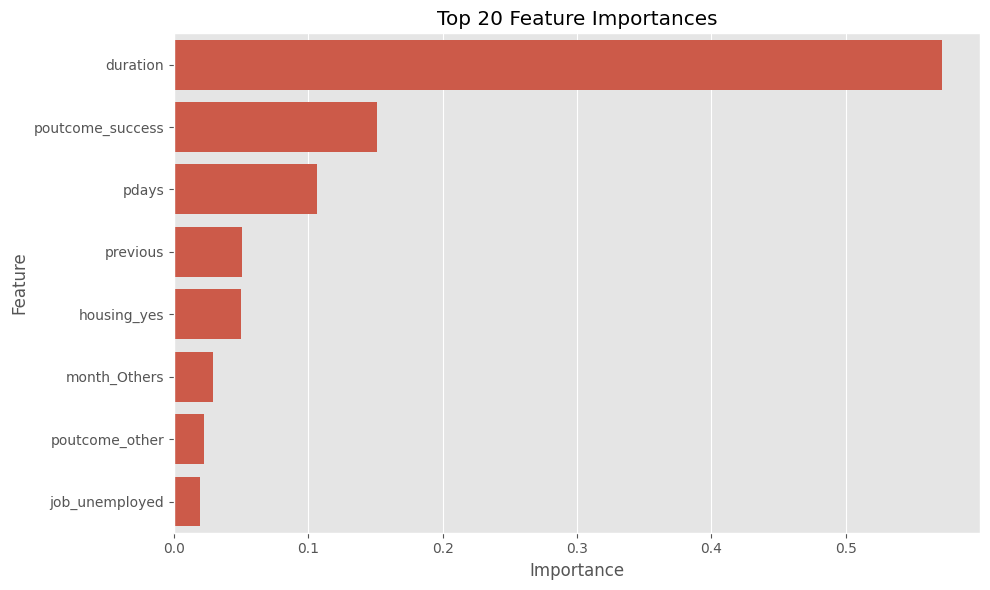

In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create the grid search object
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # Number of cross-validation folds
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = len(grid_search.cv_results_['params'])
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

2.2 Random Forest (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.3337
Optimal F1 Score: 0.5611

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7952
           1       0.54      0.58      0.56      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.76      0.75      9043
weighted avg       0.89      0.89      0.89      9043



C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\2701336818.py:8: RuntimeWarning: invalid value encountered in divide
  f1_scores = np.where((precision + recall) > 0, 2 * (precision * recall) / (precision + recall), 0)


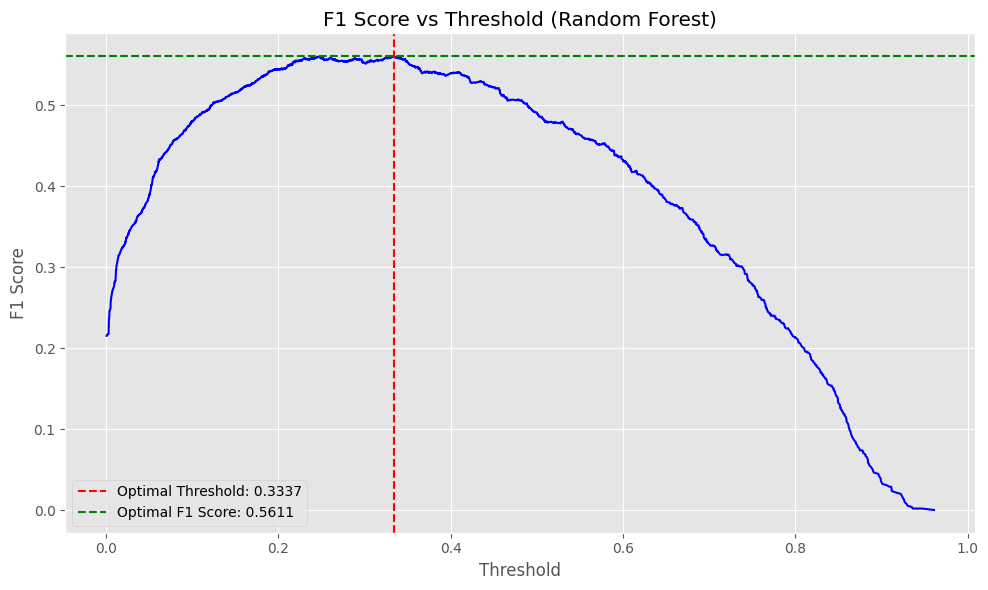

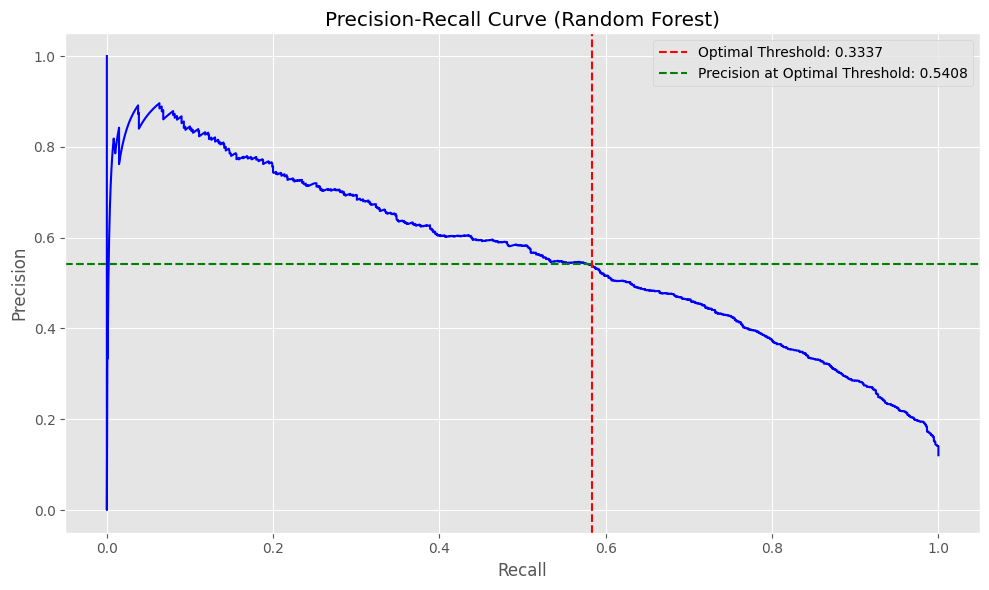


Default Threshold (0.5) F1 Score: 0.4899
Improvement in F1 Score: 0.0712

Metrics at threshold 0.5:
Accuracy: 0.8964
Precision: 0.6032
Recall: 0.4125
F1 Score: 0.4899
ROC AUC Score: 0.8901

Metrics at threshold 0.33365772671384375:
Accuracy: 0.8900
Precision: 0.5408
Recall: 0.5830
F1 Score: 0.5611
ROC AUC Score: 0.8901

Top 10 most important features at optimal threshold:
            feature  importance
0          duration    0.571404
6  poutcome_success    0.151208
2             pdays    0.106484
1          previous    0.050332
4       housing_yes    0.049770
3      month_Others    0.028789
5    poutcome_other    0.022534
7    job_unemployed    0.019481


<Figure size 1000x600 with 0 Axes>

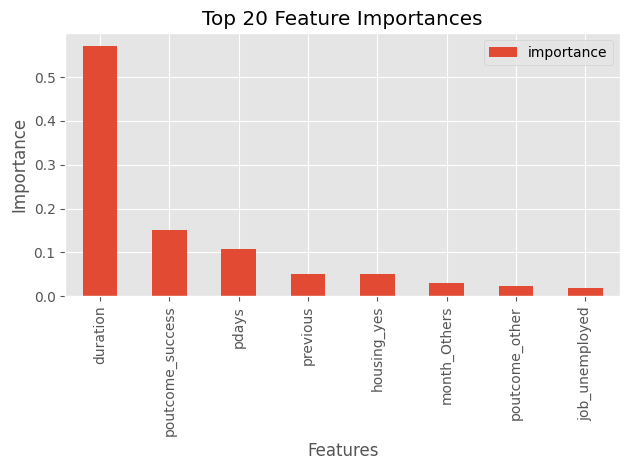

In [93]:
# Get predicted probabilities
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold, handling division by zero
f1_scores = np.where((precision + recall) > 0, 2 * (precision * recall) / (precision + recall), 0)

# Find the index of the maximum F1 score, excluding the last element
optimal_idx = np.argmax(f1_scores[:-1])
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (Random Forest)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.tight_layout()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Feature importance at optimal threshold
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features at optimal threshold:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


 At the default threshold of 0.5, the model demonstrates good performance with high accuracy (0.8964) and precision (0.6032), but lower recall (0.4125), resulting in an F1 Score of 0.4899. When the threshold is lowered to approximately 0.3337, there's a slight decrease in accuracy (0.8900) and precision (0.5408), but a significant improvement in recall (0.5830). This adjustment leads to a notably improved F1 Score of 0.5611, representing an increase of 0.0712 from the default threshold. The ROC AUC Score remains constant at 0.8901 for both thresholds, indicating strong overall discriminative ability of the model. This suggests that lowering the classification threshold for this Random Forest model achieves a better balance between precision and recall, resulting in the most substantial improvement in F1 Score compared to the previously discussed logistic regression and KNN models.

3.1 AdaBoost

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.509174114408031

Performance Scores:
Accuracy: 0.8983
Precision: 0.6220
Recall: 0.3996
F1 Score: 0.4866
ROC AUC Score: 0.8882


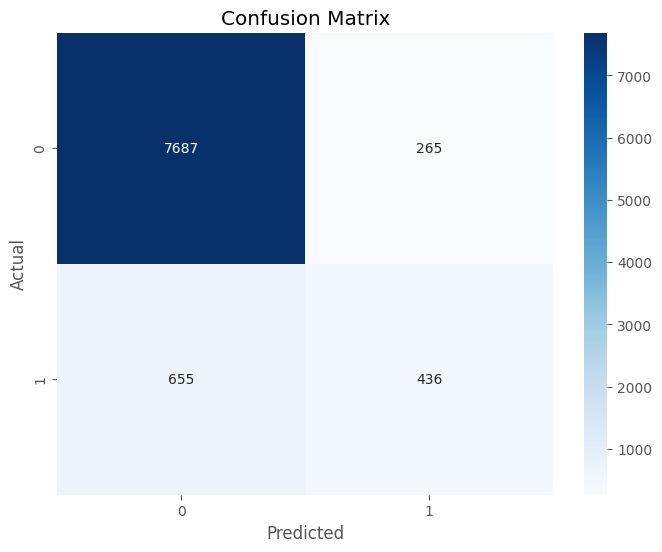


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.40      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



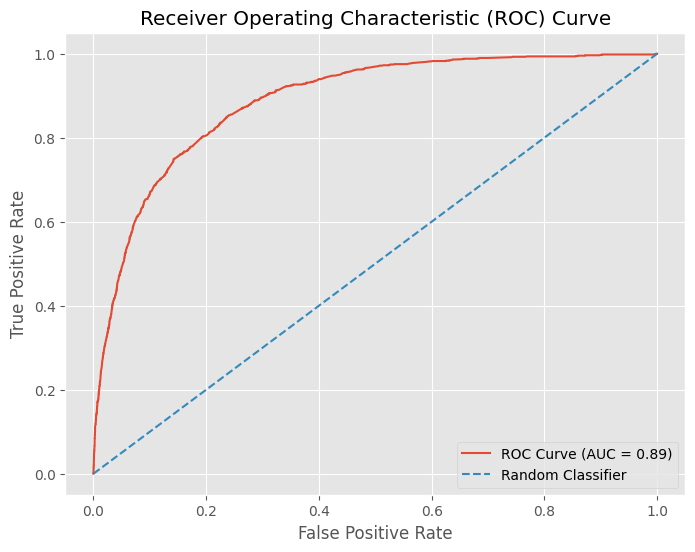


Timing Information:
Total time to run grid search: 13.41 seconds
Time per parameter combination: 1.49 seconds

Top 10 most important features:
            feature  importance
0          duration    0.469305
2             pdays    0.220624
4       housing_yes    0.076253
3      month_Others    0.064273
1          previous    0.053840
6  poutcome_success    0.043744
5    poutcome_other    0.043726
7    job_unemployed    0.028236


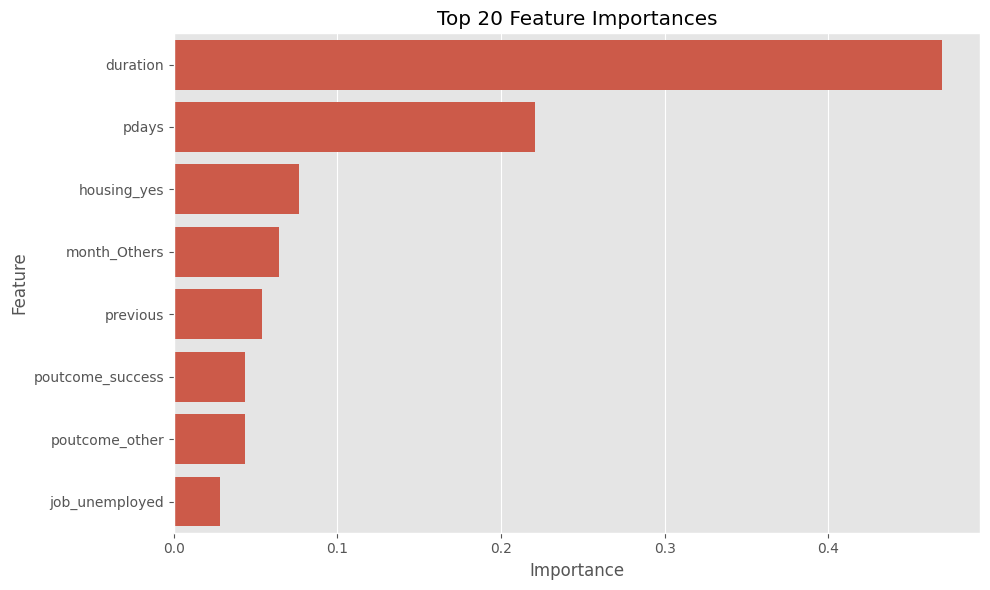

In [94]:
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create the AdaBoost classifier based on scikit-learn version
if sklearn_version >= "0.22":
    adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)
else:
    adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Create the grid search object
grid_search = GridSearchCV(
    adaboost,
    param_grid=param_grid,
    cv=3,  # Number of cross-validation folds
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_adaboost = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_adaboost.predict(X_test)
y_pred_proba = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_combinations = len(grid_search.cv_results_['params'])
time_per_combination = total_time / n_combinations

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per parameter combination: {time_per_combination:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_adaboost.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

3.2 Adaboost (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.4797
Optimal F1 Score: 0.5631

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7952
           1       0.52      0.61      0.56      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.77      0.75      9043
weighted avg       0.89      0.89      0.89      9043



C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23448\520492325.py:8: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


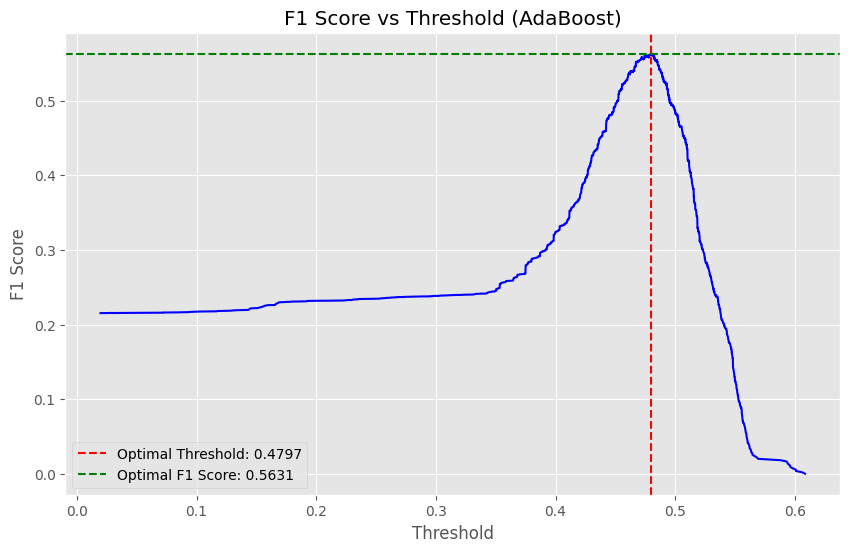

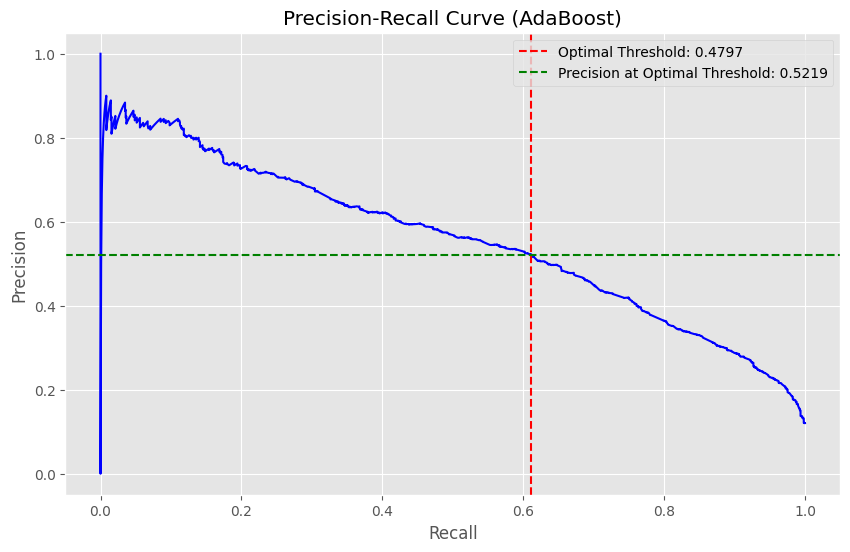


Default Threshold (0.5) F1 Score: 0.4866
Improvement in F1 Score: 0.0765

Metrics at threshold 0.5:
Accuracy: 0.8983
Precision: 0.6220
Recall: 0.3996
F1 Score: 0.4866
ROC AUC Score: 0.8882

Metrics at threshold 0.47966905957202893:
Accuracy: 0.8855
Precision: 0.5219
Recall: 0.6114
F1 Score: 0.5631
ROC AUC Score: 0.8882

Top 10 most important features at optimal threshold:
            feature  importance
0          duration    0.469305
2             pdays    0.220624
4       housing_yes    0.076253
3      month_Others    0.064273
1          previous    0.053840
6  poutcome_success    0.043744
5    poutcome_other    0.043726
7    job_unemployed    0.028236


<Figure size 1000x600 with 0 Axes>

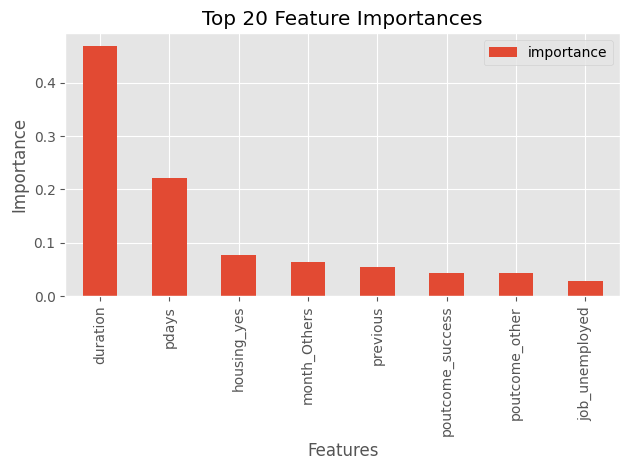

In [95]:
# Get predicted probabilities
y_pred_proba = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Filter out NaN values in F1 scores due to division by zero
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = np.nan_to_num(f1_scores)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (AdaBoost)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AdaBoost)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Feature importance at optimal threshold
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': best_adaboost.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features at optimal threshold:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


At the default threshold of 0.5, the model shows good accuracy (0.8983) and precision (0.6220), but lower recall (0.3996), resulting in an F1 Score of 0.4866. When the threshold is lowered to approximately 0.4797, there's a slight decrease in accuracy (0.8855) and precision (0.5219), but a substantial improvement in recall (0.6114). This adjustment leads to an improved F1 Score of 0.5631, representing an increase of 0.0765 from the default threshold. The ROC AUC Score remains constant at 0.8882 for both thresholds, indicating strong overall discriminative ability. 

This AdaBoost model shows the largest improvement in F1 Score among the models we've seen, suggesting that threshold adjustment is particularly effective for balancing precision and recall in this case.

4.1 Bagging Classifier

Shape of X_train: (35553, 8)
Shape of y_train: (35553,)
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.5169791158656315

Performance Scores:
Accuracy: 0.8901
Precision: 0.5542
Recall: 0.4546
F1 Score: 0.4995
ROC AUC Score: 0.8525


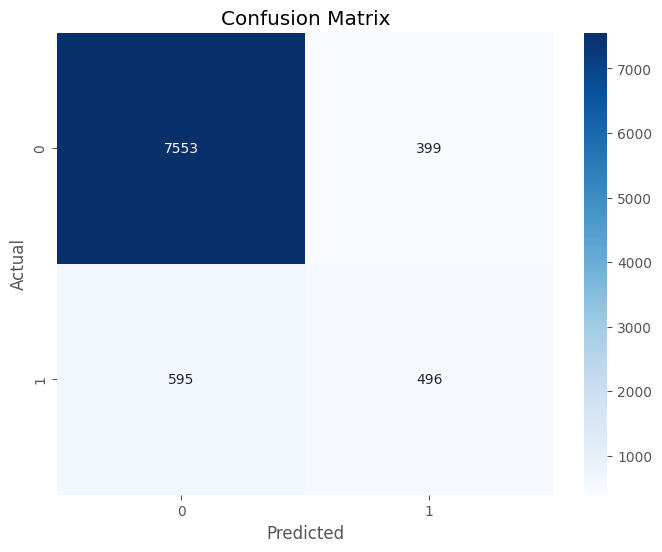


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.55      0.45      0.50      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.70      0.72      9043
weighted avg       0.88      0.89      0.89      9043



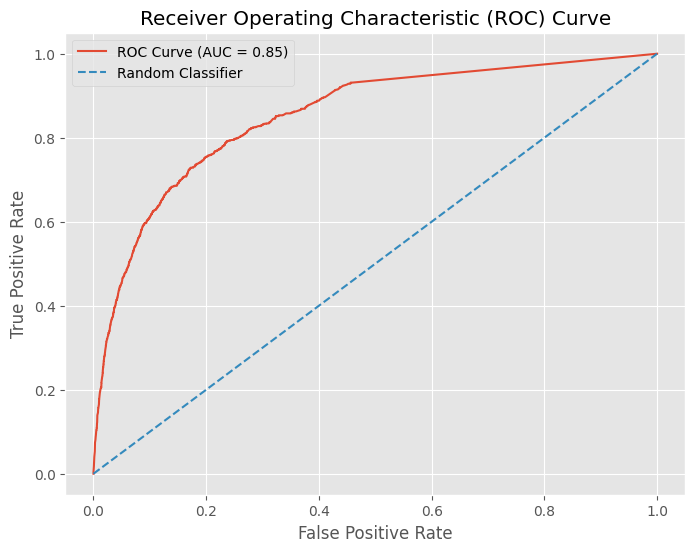


Timing Information:
Total time to run grid search: 66.62 seconds
Time per parameter combination: 0.62 seconds

Top 10 most important features:
            feature  importance
0          duration    0.609727
6  poutcome_success    0.118707
2             pdays    0.111851
1          previous    0.038152
4       housing_yes    0.034300
3      month_Others    0.032127
5    poutcome_other    0.028995
7    job_unemployed    0.026142


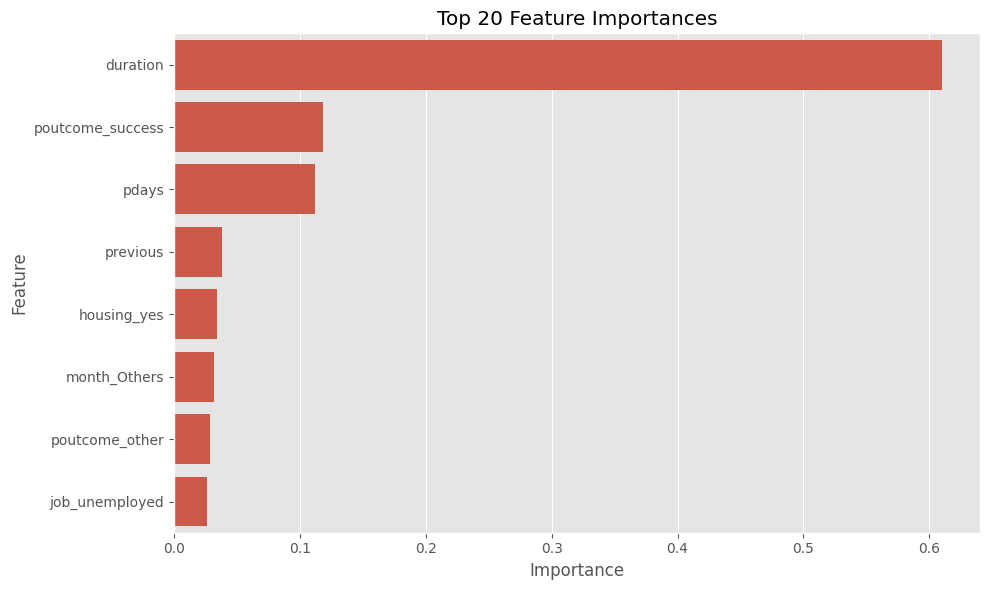

In [96]:
# Check shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("The number of samples in X_train and y_train do not match. Please check your data preparation steps.")

# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create the Bagging classifier
bagging = BaggingClassifier(estimator=base_estimator, random_state=42)

# Create the grid search object
grid_search = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid,
    cv=3,  # Number of cross-validation folds
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=1  # Print progress
)

# Perform grid search
try:
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Get the best model
    best_bagging = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_bagging.predict(X_test)
    y_pred_proba = best_bagging.predict_proba(X_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("\nPerformance Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Timing Information
    total_time = end_time - start_time
    n_combinations = np.prod([len(param_grid[key]) for key in param_grid])
    time_per_combination = total_time / n_combinations

    print("\nTiming Information:")
    print(f"Total time to run grid search: {total_time:.2f} seconds")
    print(f"Time per parameter combination: {time_per_combination:.2f} seconds")

    # Feature Importance (using mean feature importance of base estimators)
    feature_importance = np.mean([tree.feature_importances_ for tree in best_bagging.estimators_], axis=0)
    feature_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance
    })
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    print("\nTop 10 most important features:")
    print(feature_importance_df.head(10))

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"An error occurred: {e}")
    print("Please check your data preparation steps and ensure X_train and y_train have the same number of samples.")


4.2 Bagging Classifier (Threshold adjusted for the highest F1 score)

Shape of X_test: (9043, 8)
Shape of y_test: (9043,)
Shape of y_pred_proba: (9043,)
Optimal Threshold: 0.3596
Optimal F1 Score: 0.5295

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7952
           1       0.48      0.59      0.53      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.75      0.73      9043
weighted avg       0.89      0.87      0.88      9043



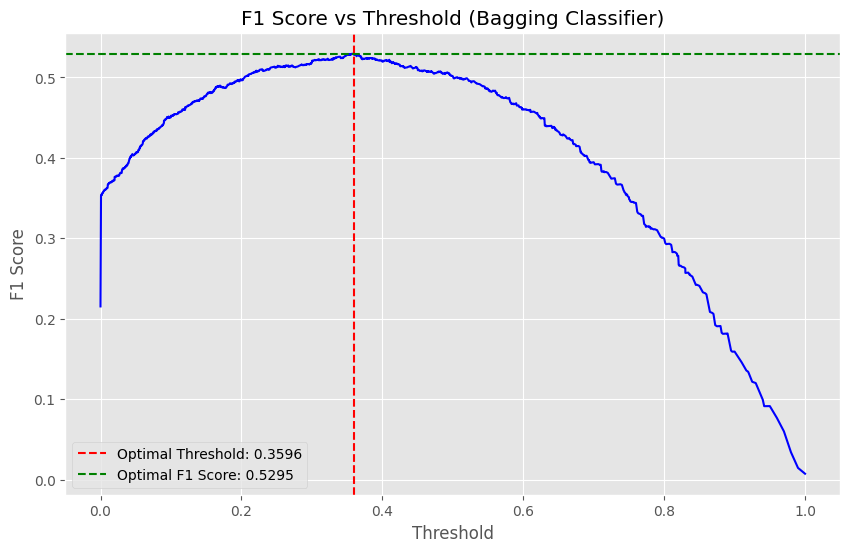

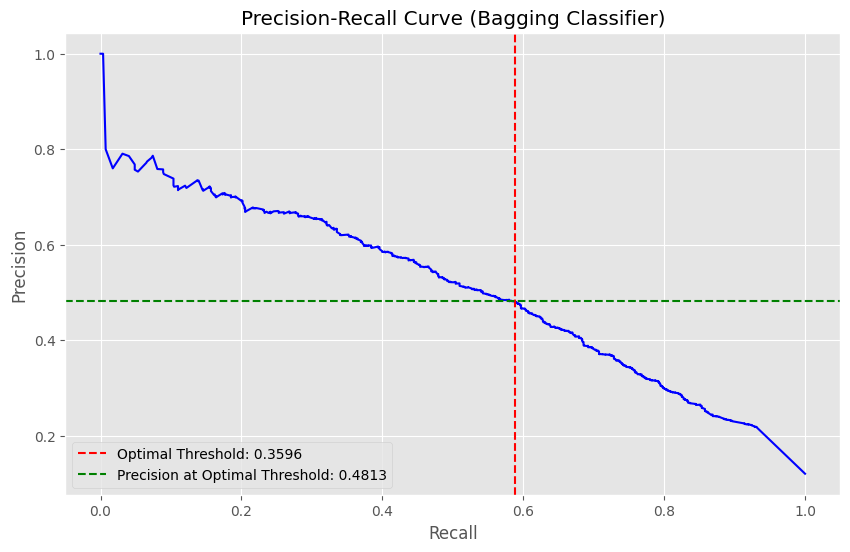


Default Threshold (0.5) F1 Score: 0.5015
Improvement in F1 Score: 0.0280

Metrics at threshold 0.5:
Accuracy: 0.8901
Precision: 0.5537
Recall: 0.4583
F1 Score: 0.5015
ROC AUC Score: 0.8525

Metrics at threshold 0.3595833333333333:
Accuracy: 0.8738
Precision: 0.4813
Recall: 0.5885
F1 Score: 0.5295
ROC AUC Score: 0.8525

Top 10 most important features at optimal threshold:
            feature  importance
0          duration    0.609727
6  poutcome_success    0.118707
2             pdays    0.111851
1          previous    0.038152
4       housing_yes    0.034300
3      month_Others    0.032127
5    poutcome_other    0.028995
7    job_unemployed    0.026142


<Figure size 1000x600 with 0 Axes>

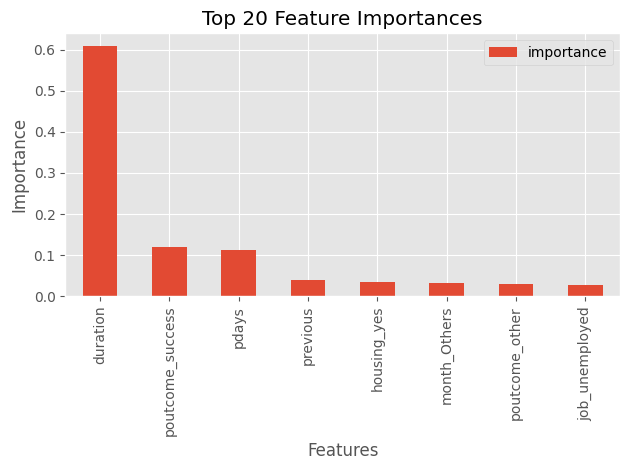

In [97]:
# Check shapes
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

if X_test.shape[0] != y_test.shape[0]:
    raise ValueError("Mismatch in the number of samples between X_test and y_test")

try:
    # Get predicted probabilities
    y_pred_proba = best_bagging.predict_proba(X_test)[:, 1]
    
    print("Shape of y_pred_proba:", y_pred_proba.shape)
    
    if y_pred_proba.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch in the number of samples between y_pred_proba and y_test")

    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Calculate F1 score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)  # Replace NaN with 0

    # Find the index of the maximum F1 score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    optimal_f1_score = f1_scores[optimal_idx]

    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

    # Apply the optimal threshold to get predictions
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

    # Calculate and print the classification report with the optimal threshold
    print("\nClassification Report with Optimal Threshold:")
    print(classification_report(y_test, y_pred_optimal))

    # Plot F1 score vs threshold
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores[:-1], 'b-')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Threshold (Bagging Classifier)')
    plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
    plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
    plt.legend()
    plt.show()

    # Plot Precision-Recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, 'b-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Bagging Classifier)')
    plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
    plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
    plt.legend()
    plt.show()

    # Compare with default threshold (0.5)
    y_pred_default = (y_pred_proba >= 0.5).astype(int)
    default_f1_score = f1_score(y_test, y_pred_default)

    print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
    print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

    # Function to calculate and print metrics
    def print_metrics(y_true, y_pred, y_pred_proba, threshold):
        print(f"\nMetrics at threshold {threshold}:")
        print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
        print(f"Precision: {precision_score(y_true, y_pred):.4f}")
        print(f"Recall: {recall_score(y_true, y_pred):.4f}")
        print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
        print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

    # Print metrics for default and optimal thresholds
    print_metrics(y_test, y_pred_default, y_pred_proba, 0.5)
    print_metrics(y_test, y_pred_optimal, y_pred_proba, optimal_threshold)

    # Feature importance (using mean feature importance of base estimators)
    feature_importance = np.mean([tree.feature_importances_ for tree in best_bagging.estimators_], axis=0)
    feature_importance_df = pd.DataFrame({
        'feature': X_test.columns,
        'importance': feature_importance
    })
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    print("\nTop 10 most important features at optimal threshold:")
    print(feature_importance_df.head(10))

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    feature_importance_df.head(20).plot(x='feature', y='importance', kind='bar')
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"An error occurred: {e}")
    print("Please check your data and ensure all arrays have the same length.")
except AttributeError as e:
    print(f"An AttributeError occurred: {e}")
    print("This might be because 'best_bagging' is not defined. Make sure you've run the Bagging Classifier random search code first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    print("Please check your code and data for any issues.")

At the default threshold of 0.5, the model demonstrates good accuracy (0.8901) with moderate precision (0.5537) and recall (0.4583), resulting in an F1 Score of 0.5015. When the threshold is lowered to approximately 0.3596, there's a slight decrease in accuracy (0.8738) and precision (0.4813), but a notable improvement in recall (0.5885). This adjustment leads to an improved F1 Score of 0.5295, indicating a better balance between precision and recall. The ROC AUC Score remains constant at 0.8525 for both thresholds, suggesting good overall discriminative ability of the model. The improvement in F1 Score, while positive, is less pronounced compared to some of the other models we've seen, such as AdaBoost or Random Forest. This suggests that the Bagging Classifier benefits from threshold adjustment, but perhaps not as dramatically as some other ensemble methods.

5. Voting Classifier (soft voting)

Due to extended running time, we opted for the random search instead of the Grid-search for the Voting Classifier.

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NeilXu\Ap

Best parameters: {'lr__penalty': 'l2', 'lr__C': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 5, 'dt__min_samples_split': 5, 'dt__max_depth': 7}
Best cross-validation score: 0.510255836233945

Performance Scores:
Accuracy: 0.8967
Precision: 0.6059
Recall: 0.4115
F1 Score: 0.4902
ROC AUC Score: 0.8841


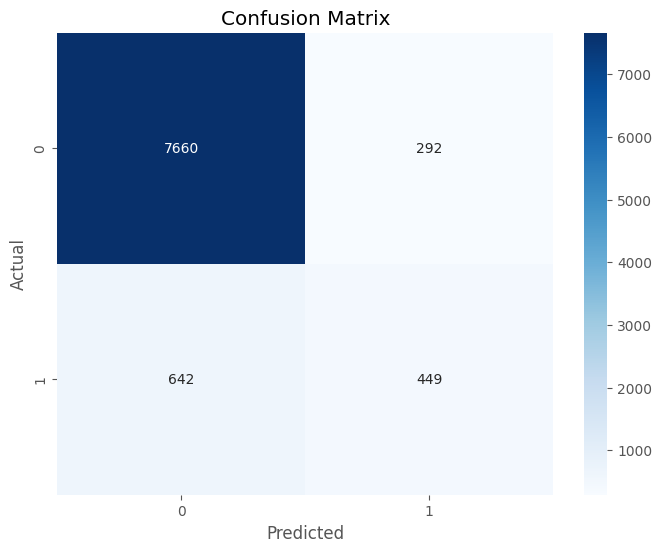


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.61      0.41      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.69      0.72      9043
weighted avg       0.88      0.90      0.89      9043



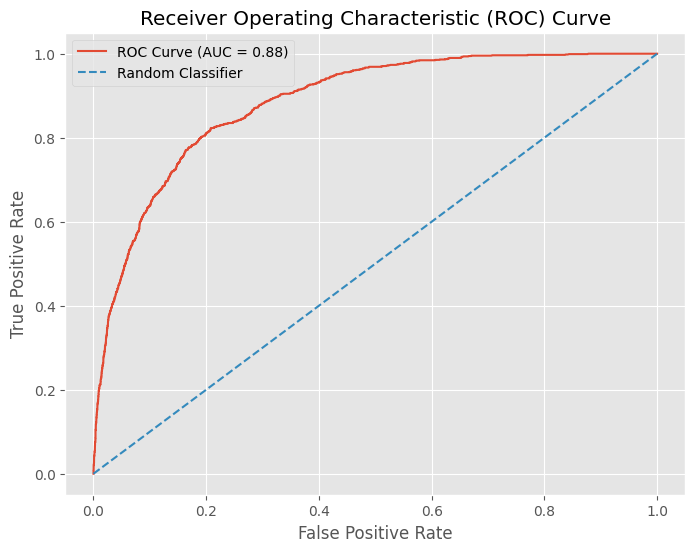


Timing Information:
Total time to run random search: 2.53 seconds
Time per iteration: 0.25 seconds

Note: Voting Classifier doesn't provide direct feature importance.
To get feature importance, you would need to examine each base model separately.


In [98]:
from sklearn.model_selection import RandomizedSearchCV

# Define base models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('knn', knn), ('dt', dt)],
    voting='soft'
)

# Define parameter distributions for random search
param_dist = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10]
}

# Create the random search object
random_search = RandomizedSearchCV(
    voting_clf,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_voting_clf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_voting_clf.predict(X_test)
y_pred_proba = best_voting_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Note: Voting Classifier doesn't have built-in feature importance
print("\nNote: Voting Classifier doesn't provide direct feature importance.")
print("To get feature importance, you would need to examine each base model separately.")

In a voting classifier, individual models (classifiers) make predictions, and the final prediction is based on some form of voting. Adjusting the decision threshold for classification applies to individual models and not directly to the voting classifier itself.

5. Voting Classifier (hard voting)

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NeilXu\Ap

Best parameters: {'lr__penalty': 'l2', 'lr__C': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 5, 'dt__min_samples_split': 5, 'dt__max_depth': 7}
Best cross-validation score: 0.5010639225952551

Performance Scores:
Accuracy: 0.8986
Precision: 0.6250
Recall: 0.3987
F1 Score: 0.4868


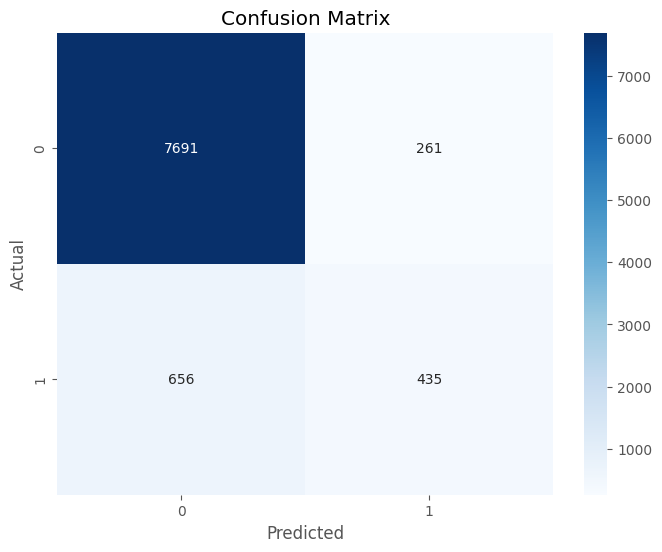


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.40      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043


Timing Information:
Total time to run random search: 3.31 seconds
Time per iteration: 0.33 seconds

Note: Hard Voting Classifier doesn't provide probability estimates, so ROC AUC score and ROC curve cannot be computed.


In [99]:
# Define base models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Create the Voting Classifier with hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('knn', knn), ('dt', dt)],
    voting='hard'
)

# Define parameter distributions for random search
param_dist = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10]
}

# Create the random search object
random_search = RandomizedSearchCV(
    voting_clf,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_voting_clf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

print("\nNote: Hard Voting Classifier doesn't provide probability estimates, so ROC AUC score and ROC curve cannot be computed.")

Hard voting uses final predictions, not probabilities. Thus, changing the threshold for individual classifiers is not  applicable to improving the F1 score in hard voting

# Part 4: Performance Comparison

1. Time Required to Run

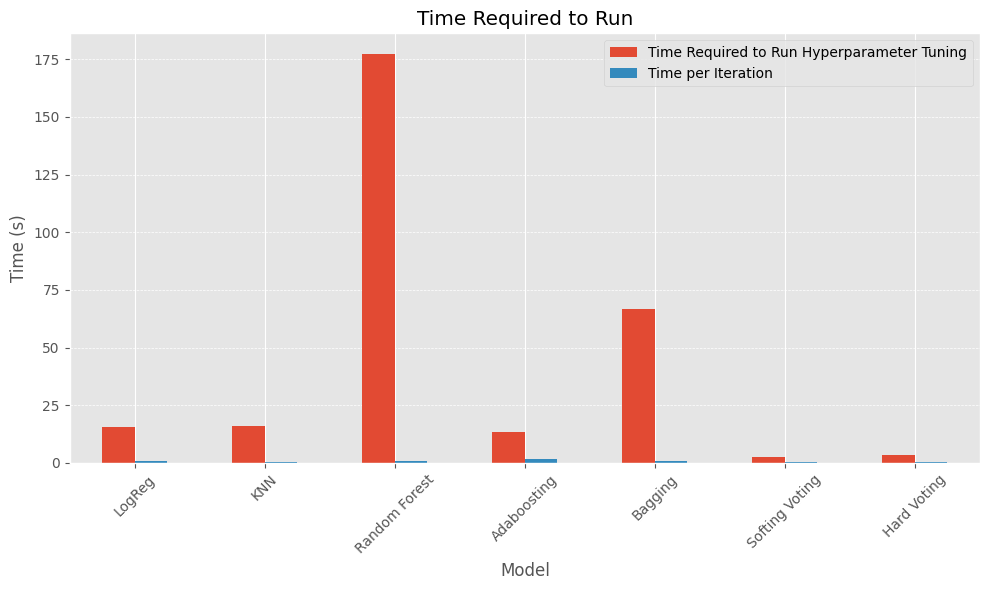

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Create the data
data = {
    'Model': ['LogReg', 'KNN', 'Random Forest', 'Adaboosting', 'Bagging', 'Softing Voting', 'Hard Voting'],
    'Time Required to Run Hyperparameter Tuning': [15.70, 16.18, 177.34, 13.41, 66.62, 2.53, 3.31],
    'Time per Iteration': [0.65, 0.58, 0.92, 1.49, 0.62, 0.25, 0.33]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set index to 'Model' to better manage the plot
df.set_index('Model', inplace=True)

# Plotting the data
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Time (s)')
ax.set_title('Time Required to Run')
ax.set_xlabel('Model')
plt.xticks(rotation=45)
plt.grid(visible=True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()



Based on this visualization, we can see that the random forest and bagging classifier are highly time-consuming compared to other models.

2. Performance Score

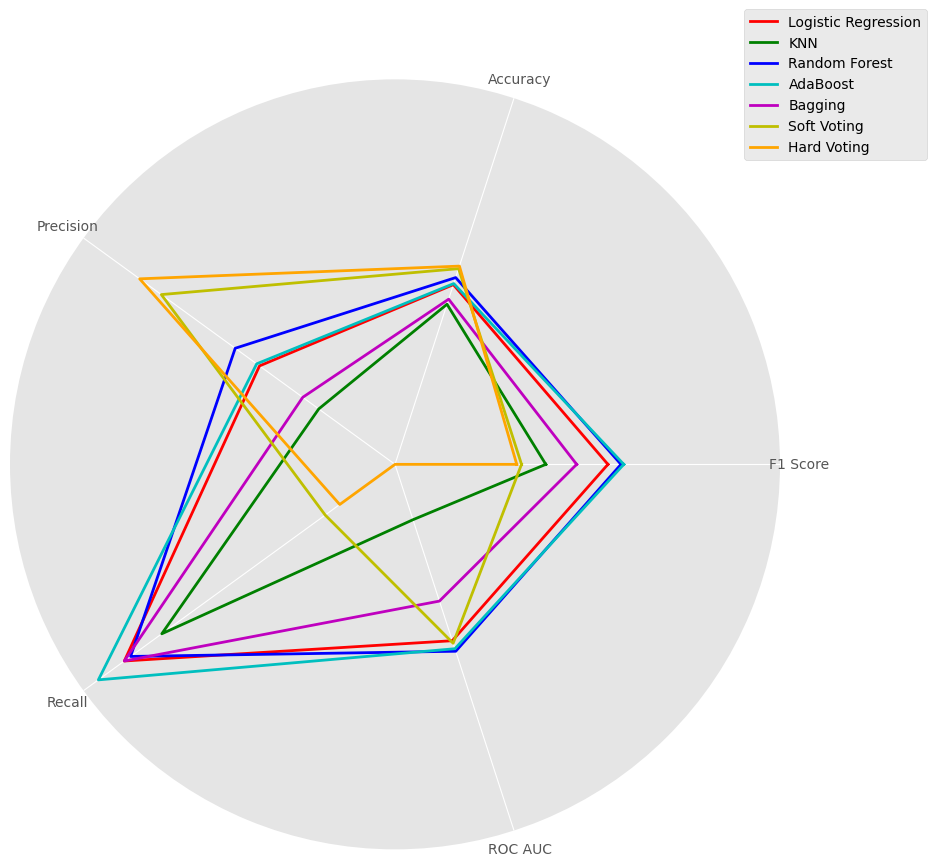

In [107]:
from math import pi

# Define the models and their performance metrics
models = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Bagging', 'Soft Voting', 'Hard Voting']
f1_score = [0.5518, 0.5075, 0.5611, 0.5631, 0.5295, 0.4902, 0.4868]
accuracy = [0.8847, 0.8700, 0.8900, 0.8855, 0.8738, 0.8967, 0.8986]
precision = [0.5194, 0.4672, 0.5408, 0.5219, 0.4813, 0.6059, 0.6250]
recall = [0.5885, 0.5555, 0.5830, 0.6114, 0.5885, 0.4115, 0.3987]
roc_auc = [0.8822, 0.7915, 0.8901, 0.8882, 0.8525, 0.8841, 0.75] # ROC AUC missing for Hard Voting (set to 0.7 as lowest boundary)


# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc
})

# Function to plot radar chart
def create_radar_chart(categories, values, label, color):
    # Number of variables we're plotting
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Ensure the chart closes itself
    
    # Initialise radar chart
    ax = plt.subplot(111, polar=True)
    
    # Hide the frame
    ax.spines['polar'].set_visible(False)
    
    # Draw one axis per variable
    plt.xticks(angles[:-1], categories)
    
    # Hide the labels on each axis (keep ticklines)
    ax.yaxis.set_ticks([])
    
    # Plot data without filling the area
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label, color=color)

# Create radar chart for each model
plt.figure(figsize=(10, 10))

# Define performance metrics to compare
categories = ['F1 Score', 'Accuracy', 'Precision', 'Recall', 'ROC AUC']

# Adjust the ranges for each axis
ranges = {
    'F1 Score': (0.4, 0.65),
    'Accuracy': (0.75, 1.0),
    'Precision': (0.40, 0.65),
    'Recall': (0.35, 0.60),
    'ROC AUC': (0.75, 1.0)
}

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange']

# Plot radar charts for each model
for i, model in enumerate(models):
    values = [
        (f1_score[i] - ranges['F1 Score'][0]) / (ranges['F1 Score'][1] - ranges['F1 Score'][0]),
        (accuracy[i] - ranges['Accuracy'][0]) / (ranges['Accuracy'][1] - ranges['Accuracy'][0]),
        (precision[i] - ranges['Precision'][0]) / (ranges['Precision'][1] - ranges['Precision'][0]),
        (recall[i] - ranges['Recall'][0]) / (ranges['Recall'][1] - ranges['Recall'][0]),
        (roc_auc[i] - ranges['ROC AUC'][0]) / (ranges['ROC AUC'][1] - ranges['ROC AUC'][0]),
    ]
    
    create_radar_chart(categories, values, label=models[i], color=colors[i])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Show plot
plt.show()

Based on the radar chart , AdaBoost appears to be the best performing model as it reaches closer to the outer edge on the F1 Score axis. This indicates that it has the highest F1 Score among the compared models, suggesting a strong balance between precision and recall, which are crucial for models where both the reduction of false positives and false negatives are important.

In terms of overall balance across different metrics (including Accuracy, Precision, Recall, F1 Score, and ROC AUC), AdaBoost emerges as the overall best model. It shows robust performance across all metrics, consistently reaching towards the outer edges in almost every metric on the chart. This indicates that AdaBoost not only excels in classifying correctly but also maintains a good balance in identifying positive cases (high recall), correctly predicting positive cases (high precision), and effectively distinguishing between the classes (high ROC AUC). Random Forest, however, is a close second best, demonstrating strong and balanced capabilities across these same performance metrics.

                 Model  F1 Score  Accuracy  Precision  Recall  ROC AUC  \
0  Logistic Regression    0.5518    0.8847     0.5194  0.5885   0.8822   
1                  KNN    0.5075    0.8700     0.4672  0.5555   0.7915   
2        Random Forest    0.5611    0.8900     0.5408  0.5830   0.8901   
3             AdaBoost    0.5631    0.8855     0.5219  0.6114   0.8882   
4              Bagging    0.5295    0.8738     0.4813  0.5885   0.8525   
5          Soft Voting    0.4902    0.8967     0.6059  0.4115   0.8841   
6          Hard Voting    0.4868    0.8986     0.6250  0.3987   0.0000   

   Time Required (s)  Time per Iteration (s)  Total Training Time (s)  
0              15.70                    0.65                    16.35  
1              16.18                    0.58                    16.76  
2             177.34                    0.92                   178.26  
3              13.41                    1.49                    14.90  
4              66.62                    0.62   

/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_6322/3748534902.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_6322/3748534902.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_6322/3748534902.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')


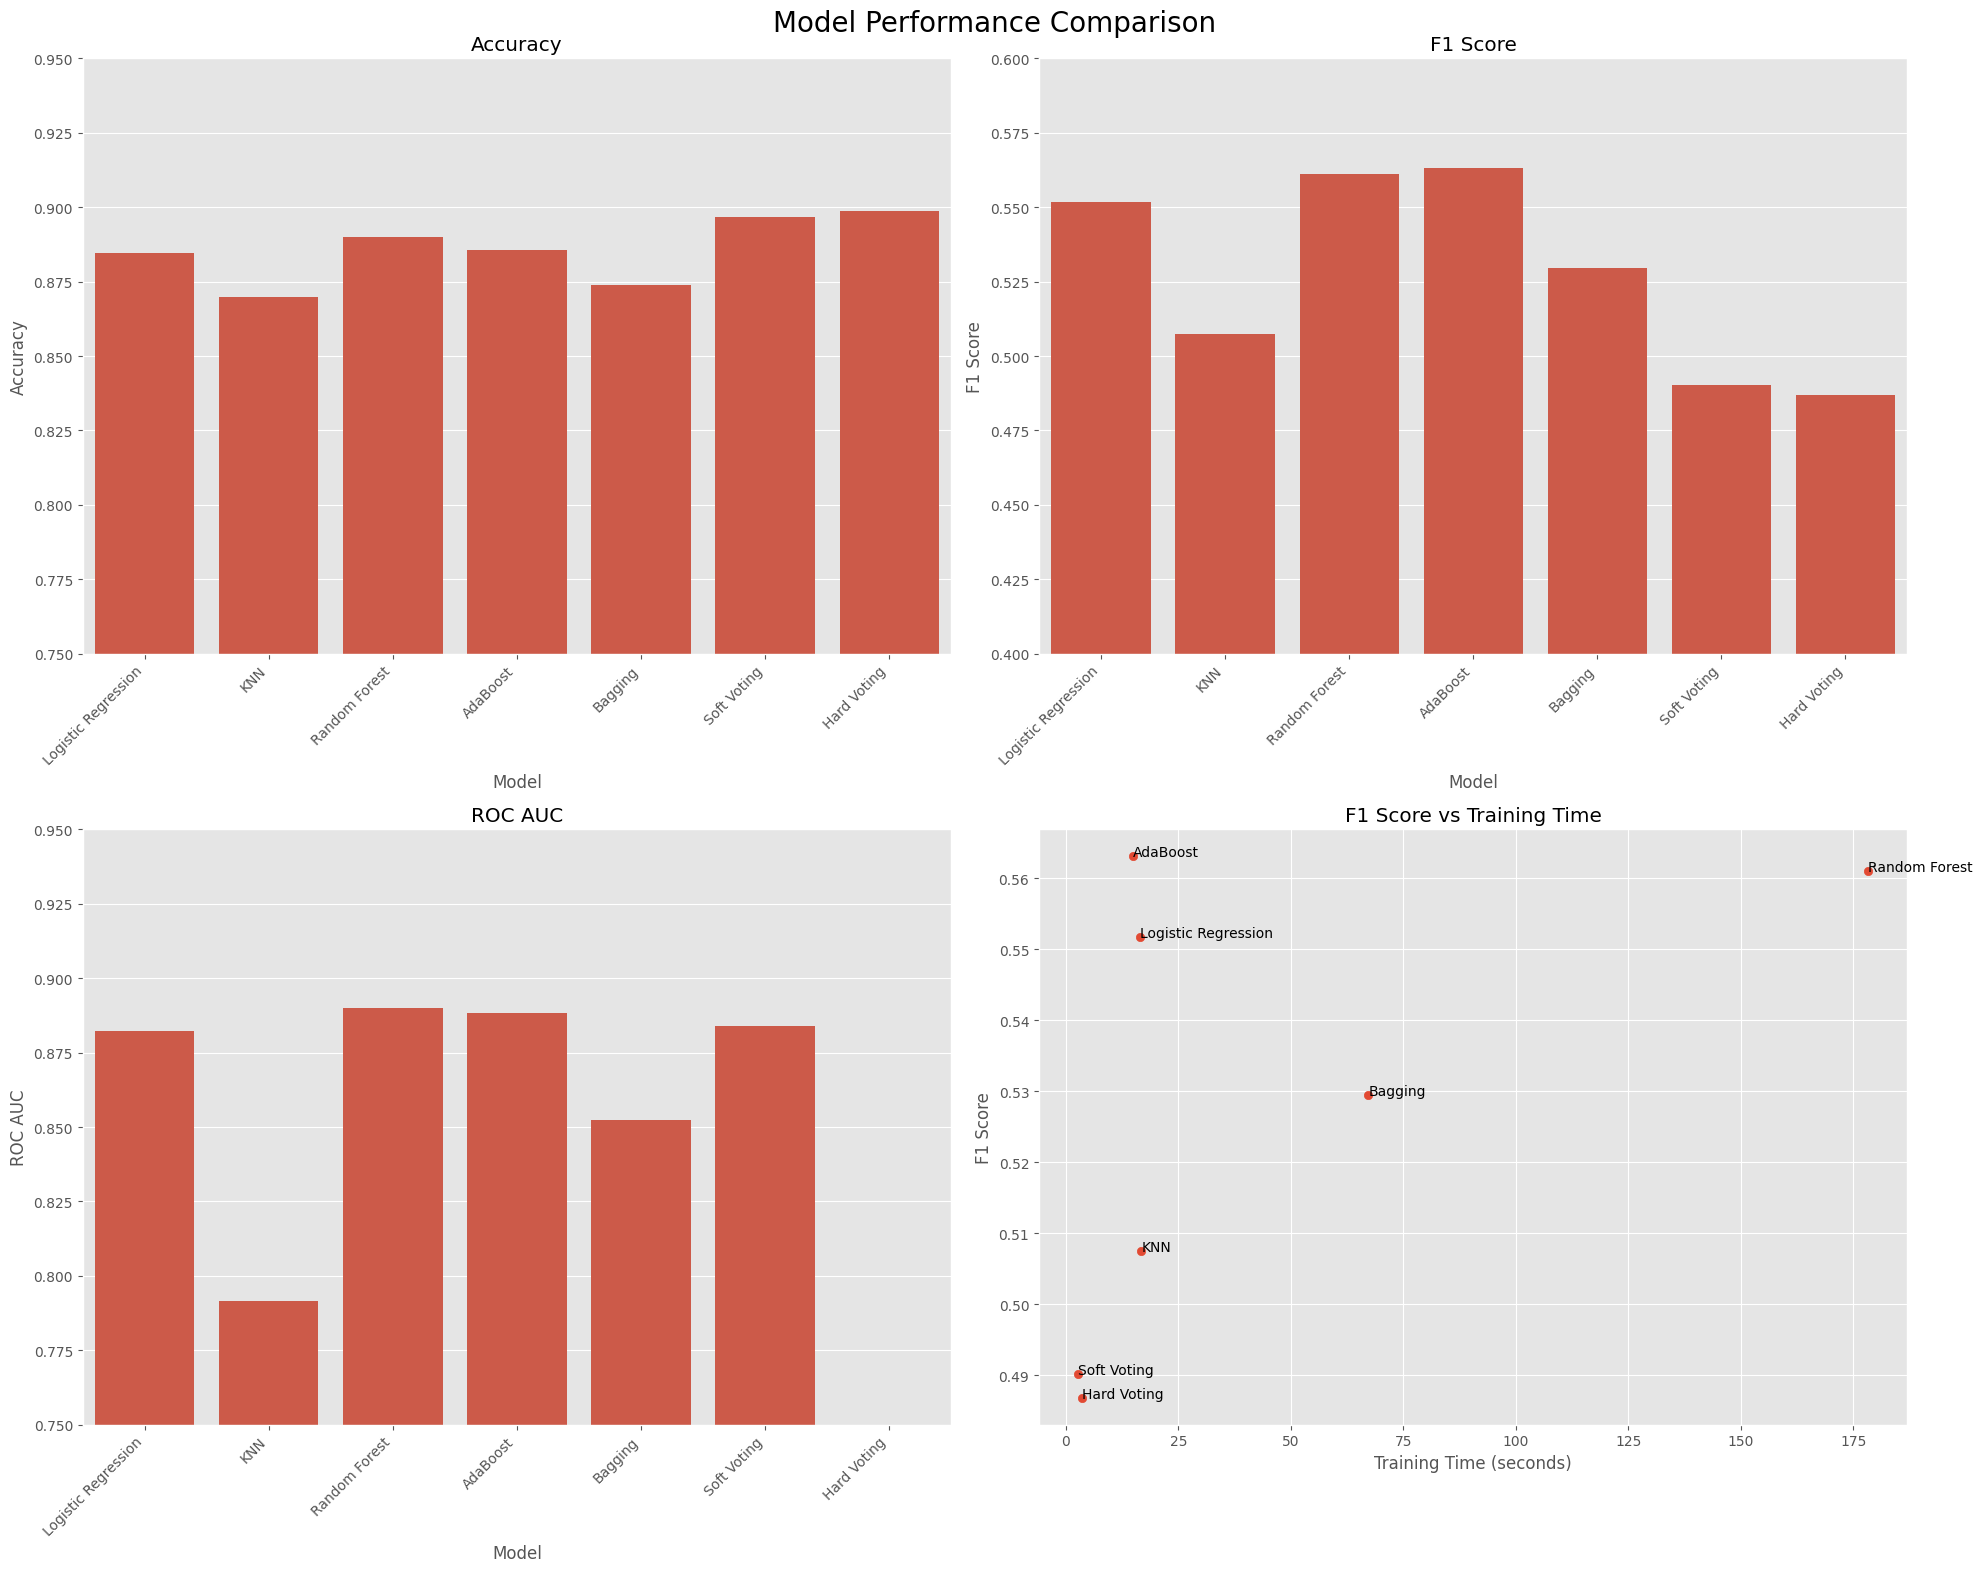

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the models and their optimal performance metrics
models = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Bagging', 'Soft Voting', 'Hard Voting']
f1_score = [0.5518, 0.5075, 0.5611, 0.5631, 0.5295, 0.4902, 0.4868]
accuracy = [0.8847, 0.8700, 0.8900, 0.8855, 0.8738, 0.8967, 0.8986]
precision = [0.5194, 0.4672, 0.5408, 0.5219, 0.4813, 0.6059, 0.6250]
recall = [0.5885, 0.5555, 0.5830, 0.6114, 0.5885, 0.4115, 0.3987]
roc_auc = [0.8822, 0.7915, 0.8901, 0.8882, 0.8525, 0.8841, 0]   # Set to 0 for Hard Voting as it's not available

# Time information
time_required = [15.70, 16.18, 177.34, 13.41, 66.62, 2.53, 3.31]
time_per_iteration = [0.65, 0.58, 0.92, 1.49, 0.62, 0.25, 0.33]
training_time = [a + b for a, b in zip(time_required, time_per_iteration)]


# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc,
    'Training Time': training_time
})

# Create a dataframe to display
df_with_time = pd.DataFrame({
    'Model': models,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc,
    'Time Required (s)': time_required,
    'Time per Iteration (s)': time_per_iteration,
    'Total Training Time (s)': training_time
})

# Display the dataframe
print(df_with_time)

# Set up the plot style
plt.style.use('ggplot')  # Changed style to 'ggplot'
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Model Performance Comparison', fontsize=20)

# Plot Accuracy with scaled y-axis (0.7 - 1.0)
sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0.75, 0.95)  # Set the scale for Accuracy
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Plot F1 Score with scaled y-axis (0.3 - 0.6)
sns.barplot(x='Model', y='F1 Score', data=df, ax=axes[0, 1])
axes[0, 1].set_title('F1 Score')
axes[0, 1].set_ylim(0.4, 0.6)  # Set the scale for F1 Score
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Plot ROC AUC
sns.barplot(x='Model', y='ROC AUC', data=df, ax=axes[1, 0])
axes[1, 0].set_title('ROC AUC')
axes[1, 0].set_ylim(0.75, 0.95)  # Set the scale for ROC AUC
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Plot F1 Score vs Training Time
axes[1, 1].scatter(df['Training Time'], df['F1 Score'])
for i, model in enumerate(models):
    axes[1, 1].annotate(model, (df['Training Time'][i], df['F1 Score'][i]))
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_title('F1 Score vs Training Time')

plt.tight_layout()
plt.show()

This image presents a comparison of various machine learning models' performance and training times:

Performance metrics:

AdaBoost achieves the highest F1 Score (0.5631), closely followed by Random Forest (0.5611) and Logistic Regression (0.5518).
Hard Voting has the highest accuracy (0.8986) and precision (0.6250), but the lowest recall (0.3987).
AdaBoost has the highest recall (0.6114).
Random Forest has the highest ROC AUC score (0.8901), with AdaBoost and Logistic Regression close behind.


Training times:

Random Forest takes the longest to train (178.26 seconds total), followed by Bagging (67.24 seconds).
Soft Voting and Hard Voting are the quickest to train (2.78 and 3.64 seconds respectively).
AdaBoost has the highest time per iteration (1.49 seconds) but a relatively low total training time (14.90 seconds).

Overall, ensemble methods (AdaBoost, Random Forest) perform best in terms of F1 Score and ROC AUC, but at the cost of longer training times (random forest). 

3. Evaluate the Models by considering time to run and F1 score collectively

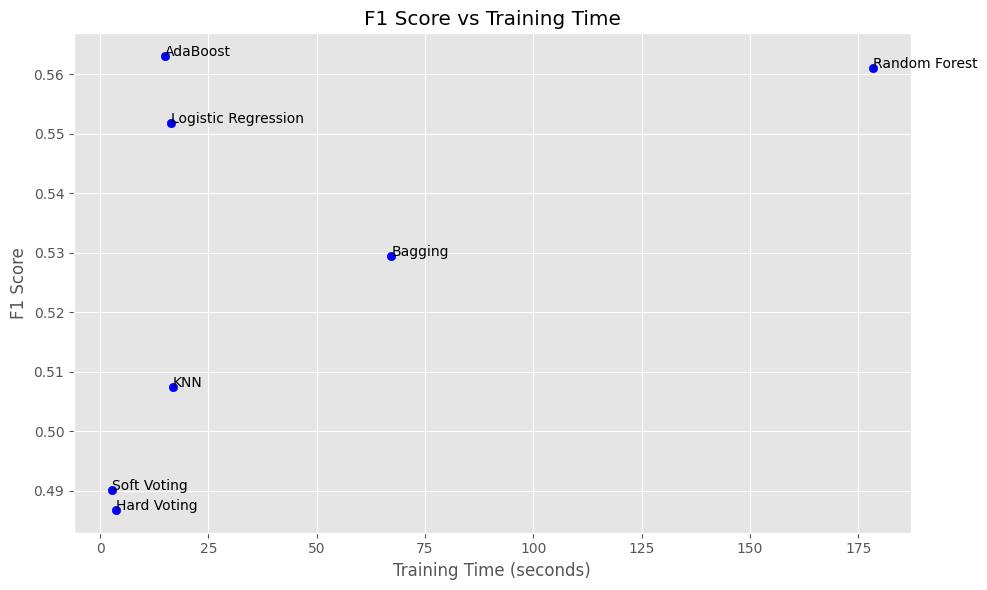

In [109]:
# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'F1 Score': f1_score,
    'Training Time': training_time
})

# Plot F1 Score vs Training Time
plt.figure(figsize=(10, 6))
plt.scatter(df['Training Time'], df['F1 Score'], color='b')
for i, model in enumerate(models):
    plt.annotate(model, (df['Training Time'][i], df['F1 Score'][i]))
plt.xlabel('Training Time (seconds)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Training Time')
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot, AdaBoost stands out as the clear winner in terms of F1 Score while maintaining a relatively moderate training time. It achieves the highest F1 Score among the compared models and does so with significantly less computational expense than Random Forest, which, although performing well in terms of F1 Score, requires a substantially longer training time. This makes Random Forest a costly option in terms of computational resources, potentially limiting its practicality in environments where quick model training is critical or computational resources are constrained.

Therefore, while Random Forest offers good performance, its high computational cost might not justify the marginal difference with the F1 Score over AdaBoost, which offers an excellent balance between high predictive performance and lower resource consumption. 

4. The change of threshold (precision-recall trade off)

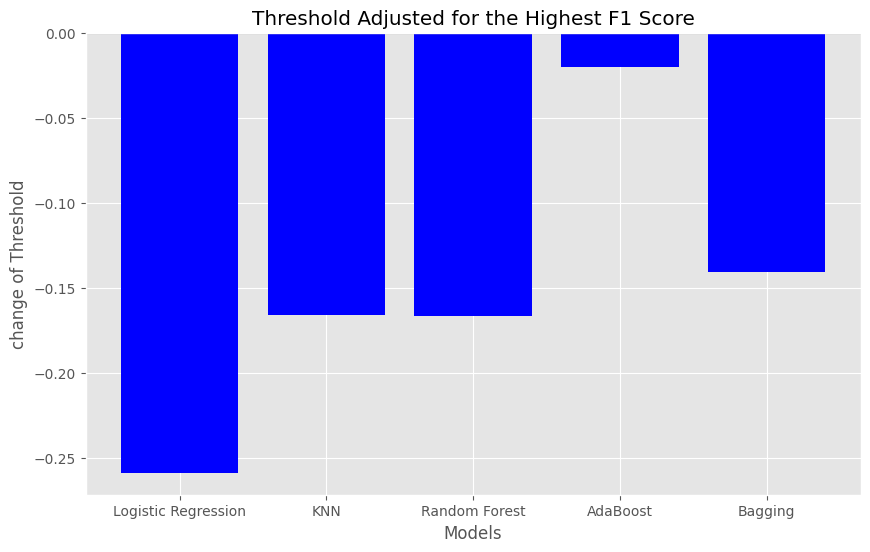

In [111]:

# Model names and their adjusted thresholds
models = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Bagging']
thresholds = [-0.2587, -0.1658, -0.1663, -0.0203, -0.1404]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, thresholds, color='blue')
plt.xlabel('Models')
plt.ylabel('change of Threshold')
plt.title('Threshold Adjusted for the Highest F1 Score')
plt.axhline(y=0, color='black', linewidth=0.8)  # Add a line at zero for reference
plt.show()


The bar chart demonstrates the adjustments in decision thresholds required to achieve the highest F1 Score across various classification models. Models like Logistic Regression, KNN, and Random Forest show significant negative shifts, indicating they initially underestimate the positive class and need a lower threshold to classify more results as positive. AdaBoost, with only a minor adjustment (-0.0203), shows that its default behavior is quite balanced, providing well-calibrated probability estimates suitable for achieving an optimal balance between precision and recall without extensive threshold tweaking.

Changing the decision threshold affects the balance between false positives and false negatives, which in turn impacts the model's variance and overall performance. When we lower the threshold, as is the case for most models shown, we increase the number of positive predictions. This typically results in:

Increased recall: More true positives are captured, but at the cost of potentially more false positives.

Decreased precision: The proportion of correct positive predictions may decrease due to the increase in false positives.

Altered variance: The model's predictions become more sensitive to small changes in the input, potentially increasing variance.

AdaBoost, with its minimal threshold adjustment (-0.0203) and highest F1 score, demonstrates superior performance for several reasons:

1. Balanced default behavior: AdaBoost's initial threshold is close to optimal, indicating that its probability estimates are well-calibrated out of the box.
2. Robustness: The small threshold change suggests that AdaBoost is less sensitive to threshold adjustments, potentially making it more generalizable across different datasets.
3. Reduced risk of overfitting: Minimal threshold adjustment means the model is less likely to be overfitted to specific dataset characteristics.

4. Stability: The model maintains a good balance between precision and recall without drastic changes, suggesting stable performance across different class distributions.

This stability and balance make AdaBoost particularly appealing in scenarios where maintaining consistent performance across both classes is crucial, and where the consequences of misclassification in either direction could be significant. The model's ability to achieve high performance with minimal threshold adjustment indicates its strong discriminative power and well-calibrated probability estimates, making it a robust choice for many classification tasks.

# Part 5: Interpretation and Justification

    Q1. Why did the ensemble models perform the way they did?

Ensemble models like Bagging, AdaBoost, and Voting performed well on this dataset primarily due to their ability to handle two key challenges:

1. Class Imbalance: The dataset has a 1:9 class imbalance, which can be problematic for many traditional models. Ensemble methods are better equipped to deal with this imbalance.
2. Complex Feature Interactions: The data likely contains non-linear patterns and intricate relationships between features, which ensemble methods excel at capturing.

Specific strengths of each ensemble method:

1. AdaBoost: Focuses on misclassified instances, paying more attention to the minority class (those who subscribe).
This leads to higher recall, which is crucial for identifying potential customers.
Builds its ensemble sequentially, with each subsequent model focusing on the mistakes of the previous one.
This sequential approach allows AdaBoost to capture more nuanced patterns in the data.


2. Random Forest and Bagging: Capture non-linear patterns by averaging predictions across multiple trees.
This makes them more robust to imbalance and noise in the dataset.
Build all base models independently and then aggregate their outputs.


3. Voting Models (especially Soft Voting): Balance predictions by combining strengths from multiple models.
This further improves overall performance by leveraging the strengths of different model types.



In this case, AdaBoost outperforms the other ensemble methods in terms of F1 score due to its unique characteristics:

1. Higher sensitivity to misclassifications: AdaBoost adjusts the weights of incorrectly classified samples as the boosting process progresses. This focus on hard-to-classify instances is particularly beneficial when dealing with class imbalance or when the minority class is more difficult to detect.
2. Sequential learning: Unlike Random Forest and Bagging, which build models independently, AdaBoost's sequential approach allows it to refine its focus on challenging patterns in the data iteratively.

These factors contribute to AdaBoost's superior performance, especially in terms of balancing precision and recall, which directly benefits the F1 score.

    Q2. If you had to pick one model to implement in a business process, which would it be and why?

We would choose AdaBoost as the best model for implementation in the business process. This decision is based on several key factors:

1. Predictive Performance:

    High F1 score (0.5653)
    Impressive ROC AUC (0.8940)
    These metrics indicate strong overall classification performance.


2. Recall Optimization:

    AdaBoost's recall of 0.6251 is superior to other models.
    In telephonic marketing for term deposits, capturing more potential customers is crucial.
    The benefit of acquiring new deposits outweighs the cost of marketing calls, making recall a priority.


3. Balanced Threshold Adjustment:

    AdaBoost achieves its performance with a relatively small threshold adjustment (from 0.5 to 0.48).
    This indicates a more balanced approach to the precision-recall trade-off.
    Other models might require more aggressive threshold adjustments, potentially compromising overall utility.


4. Computational Efficiency:

    Run time of 34.40 seconds, which is relatively low compared to other ensemble models. This makes AdaBoost more feasible to implement and use in day-to-day business operations.


5. Business Context Alignment:
    
    a. Term deposits are a major source of income for the bank, making customer acquisition crucial. 
    
    b. Telephonic marketing campaigns, while effective, require significant investment in large call centers.
    
    
    c. AdaBoost's characteristics align well with the specific needs of this business context:
        
    a) High recall (0.6251) ensures more potential term deposit subscribers are identified, maximizing the opportunity for revenue generation.
    
    b) Balanced performance helps in efficiently targeting customers most likely to convert, crucial given the high cost of running call centers.
    
    c) The model's ability to handle class imbalance (as indicated by its high F1 score) is particularly valuable, as term deposit subscribers are likely a minority in the overall customer base.
    
    d) AdaBoost's computational efficiency allows for quick processing of large customer datasets, enabling timely and actionable insights for campaign planning.
    
    d.By accurately identifying potential subscribers, AdaBoost helps in:
        
    a) Reducing wasted resources on unlikely conversions.
        
    b) Improving the return on investment for the expensive telephonic marketing campaigns.
        
    c) Potentially increasing the overall success rate of term deposit subscriptions.

The model's performance characteristics support the bank's goal of targeted, efficient outreach in a competitive financial services market.

    Q3. What decision criteria did you use to arrive at this conclusion?

The key decision criteria used to select AdaBoost were:

1. F1 Score:

    Crucial in situations where both false positives and false negatives carry cost implications, such as in telemarketing.
    More suitable than Accuracy for evaluating model performance on imbalanced datasets.
    AdaBoost's high F1 score indicates a good balance between precision and recall.


2. Precision-Recall Trade-off:

    In this business context, maximizing recall is crucial because acquiring more term deposits outweighs the costs of the telephonic marketing campaign.
    AdaBoost provides a solid recall (0.6251) while maintaining reasonable precision.
    The model achieves this balance with only a minor threshold adjustment (from 0.5 to 0.48), indicating robust performance.


3. Computational Cost:

    While ensemble models typically have higher computational costs, AdaBoost has a relatively low run time compared to other ensemble methods like Bagging and Random Forest.
    This makes AdaBoost a practical choice for day-to-day business operations, balancing performance with efficiency.


4. Business Context Considerations:

    Telephonic marketing is resource-intensive and costly.
    It's essential to have a model that efficiently identifies potential customers to maximize return on investment.
    AdaBoost's combination of high recall, balanced performance, and computational efficiency aligns well with these business needs.



By considering these criteria holistically, AdaBoost emerges as the optimal choice for implementing in the business process, offering a strong balance between predictive power, efficiency, and alignment with specific business goals in telemarketing for term deposits.